# Early and extremely early multi-label fault diagnosis in induction motors

Mario Juez-Gil <sup>a</sup>, Juan José Saucedo-Dorantes <sup>b</sup>, Álvar Arnaiz-González <sup>a</sup>, César Ignacio García-Osorio <sup>a</sup>, Carlos López-Nozal <sup>a</sup>, David Lowe <sup>c</sup>.

<sup>a</sup> Universidad de Burgos, Burgos, Spain

<sup>b</sup> Autonomous University of Queretaro, Mexico

<sup>c</sup> Aston University, Birmingham, United Kingdom

## Experiments notebook

In [2]:
from experiments_notebook_utils import *

### Determining the number of principal components

In this part of the study, we determine the optimal number of principal components to retain. For this purpose, Scree test, Kaiser rule, and Hyperparameter optimization ([Hyperopt](http://hyperopt.github.io/hyperopt/)) were used.

#### Scree and K1 rules

According to the number of principal components selected by following the K1 rule, the models performed slightly better than with the number obtained from Scree test.

Furthermore, attending to the results, a maximum number of 50 principal components can be used for the Hyperparameter optimization study.

##### 3 Hz

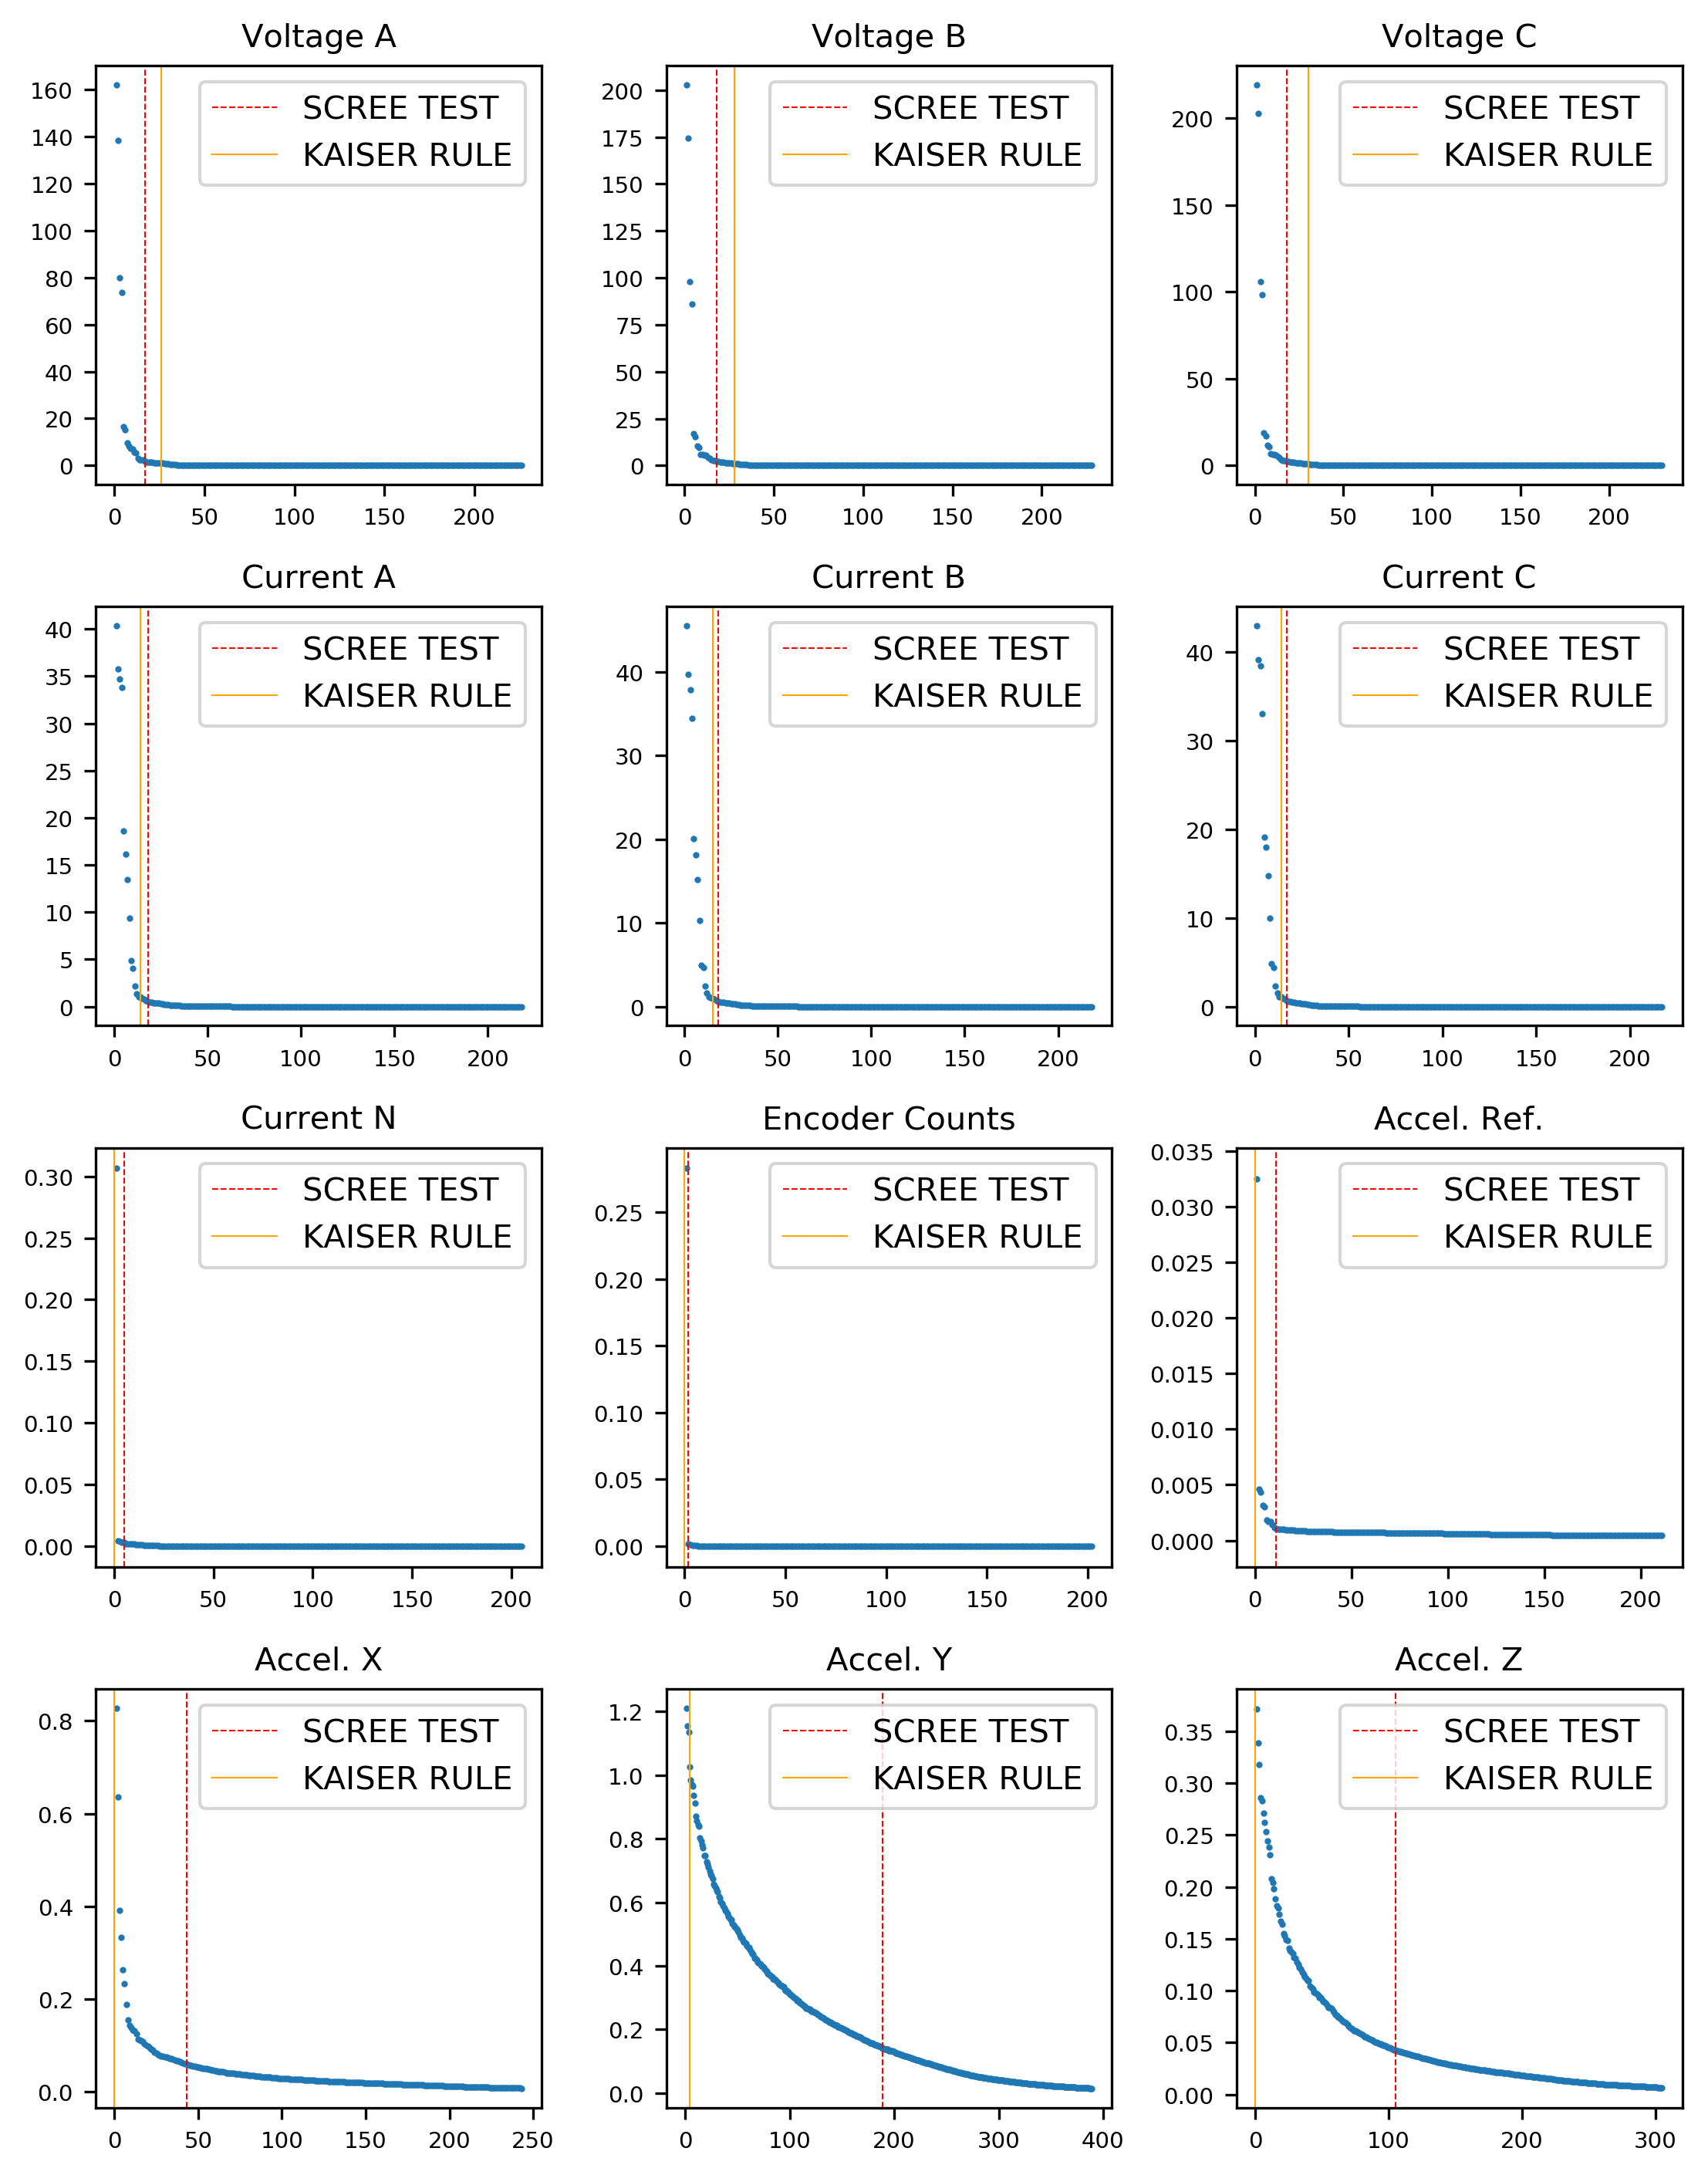

In [2]:
results_three = None
with (open(f"../results/pca/fitted_pcas_3hz_transient.pickle", "rb")) as f:
    results_three = pickle.load(f)
plot_eigenvalues(results_three)

In [3]:
tests(results_three)

,VA,VB,VC,CA,CB,CC,CN,EC,AR,AX,AY,AZ
test,,,,,,,,,,,,
SCREE,17,18,18,18,18,17,5,2,11,43,189,105
KAISER,26,28,30,14,15,14,0,0,0,0,4,0


##### 30 Hz

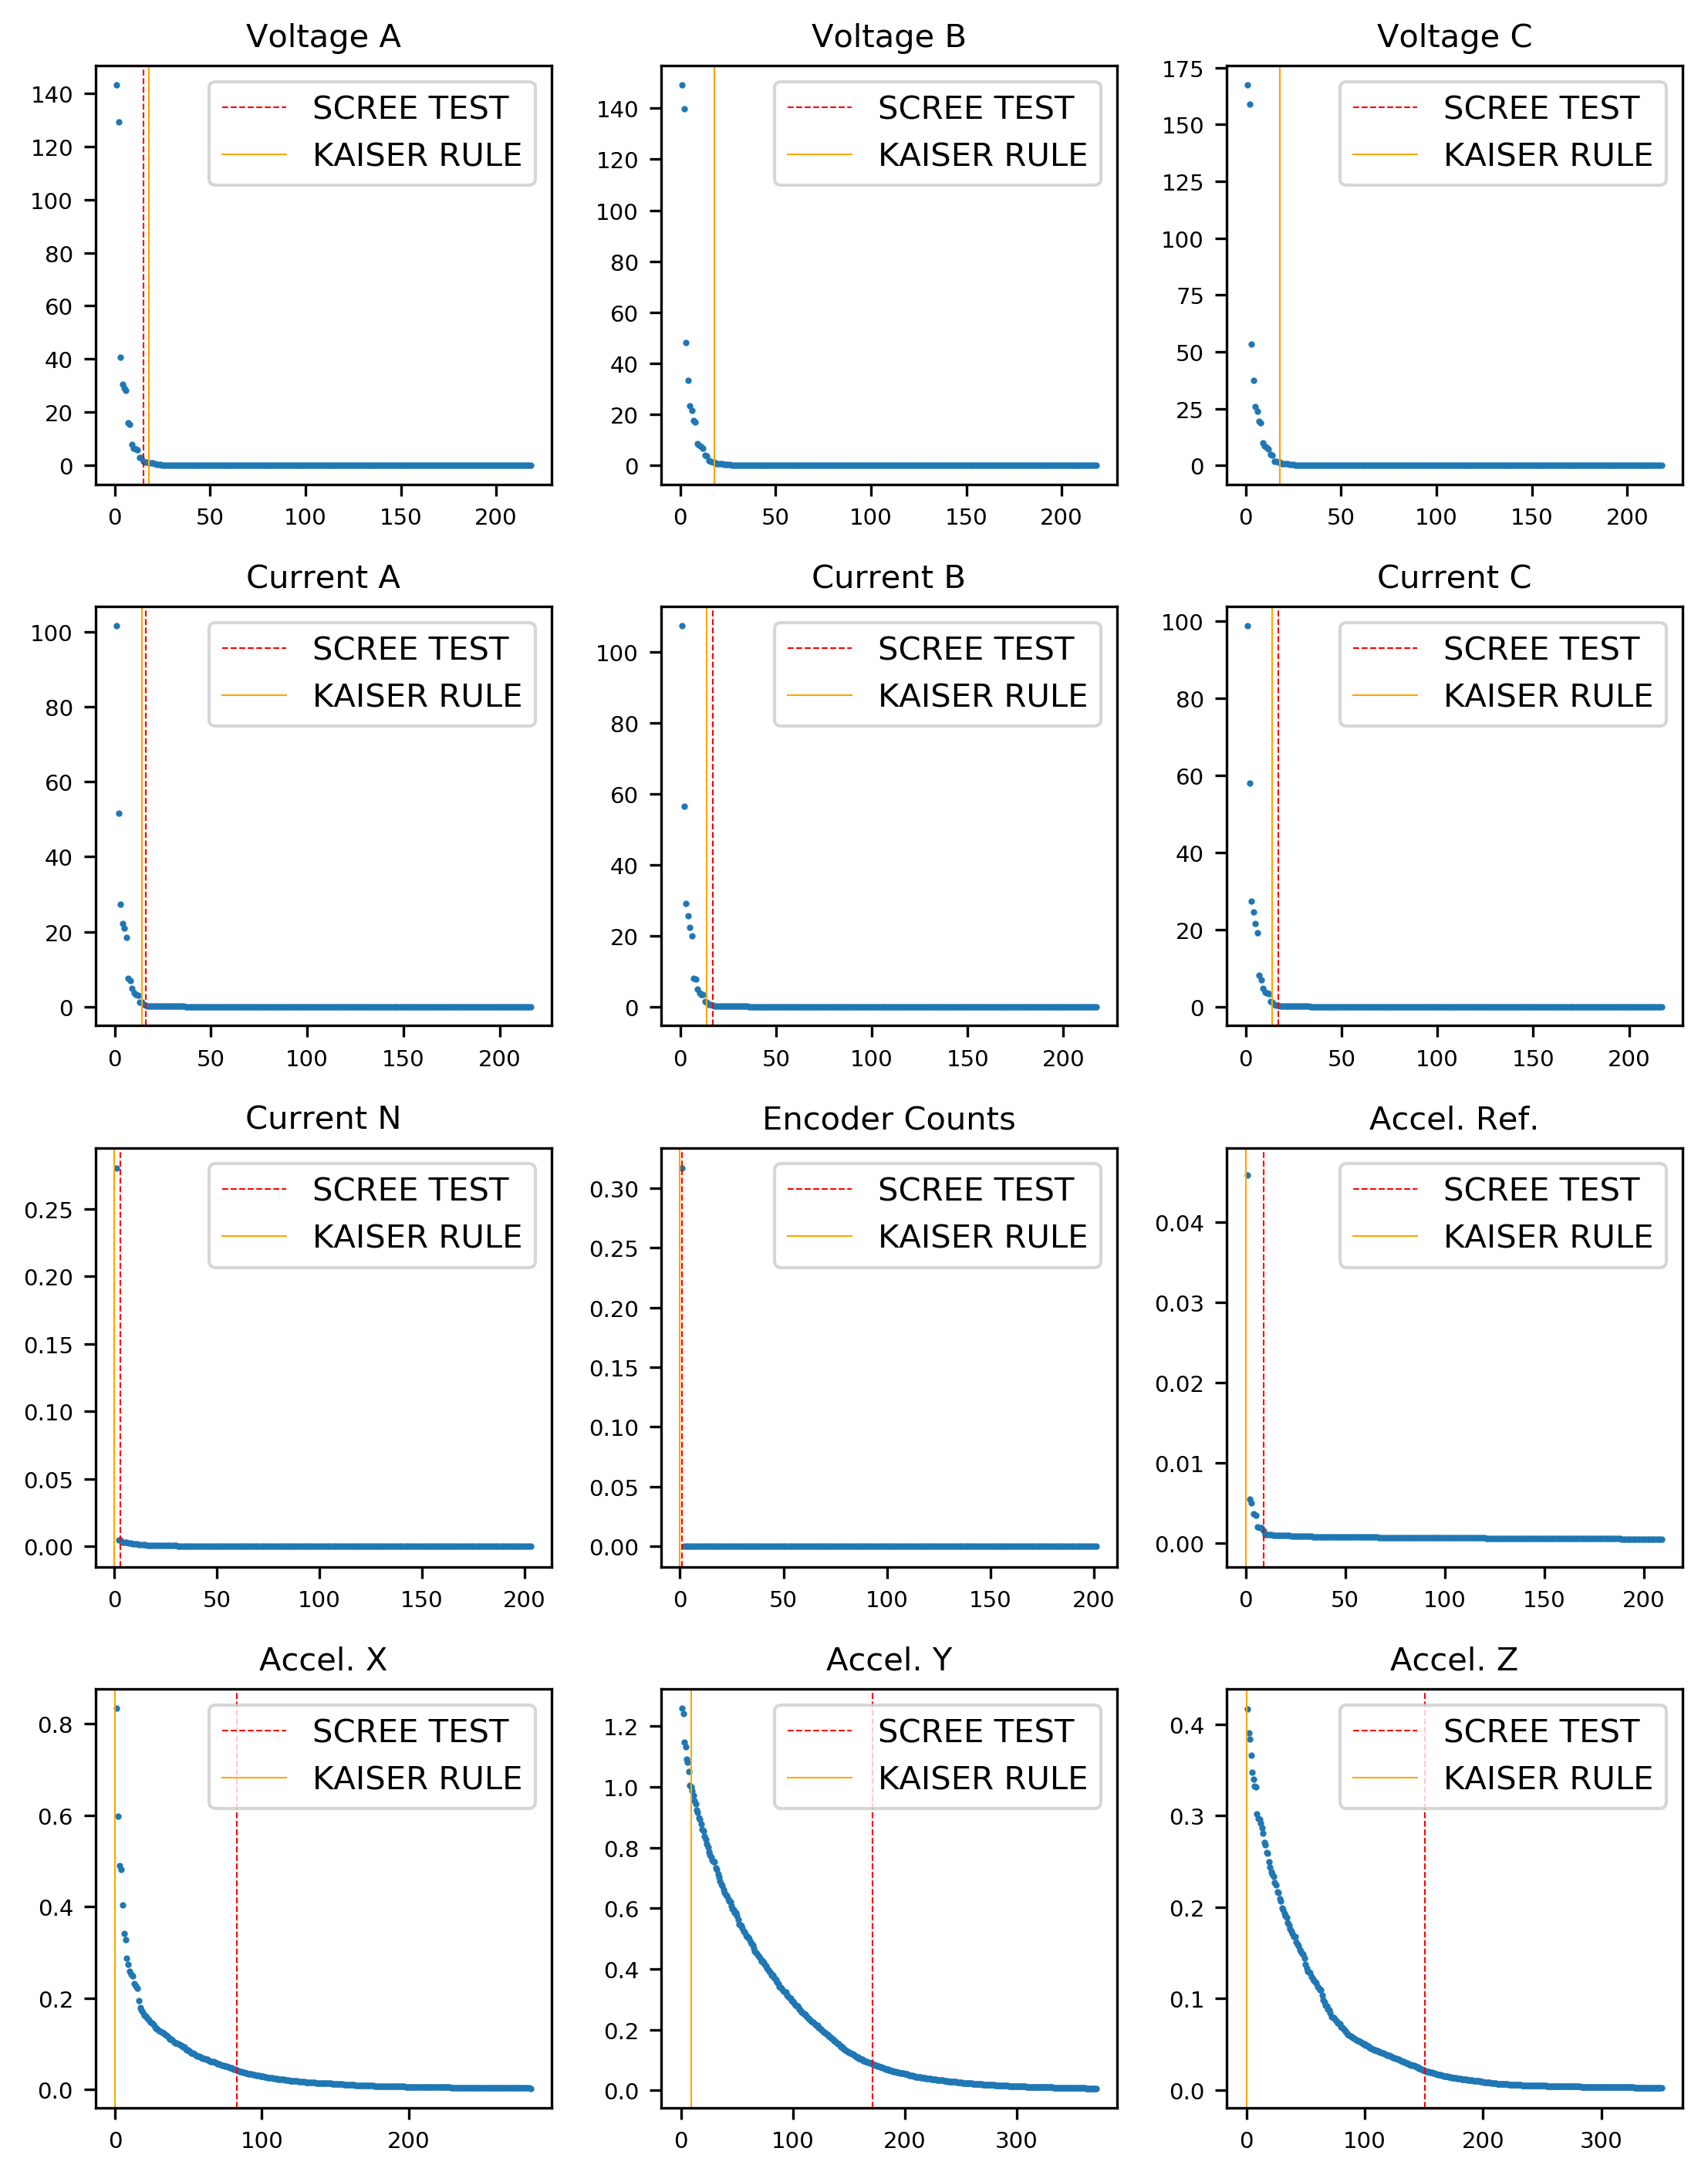

In [4]:
results_thirty = None
with (open(f"../results/pca/fitted_pcas_30hz_transient.pickle", "rb")) as f:
    results_thirty = pickle.load(f)
plot_eigenvalues(results_thirty)

In [5]:
tests(results_thirty)

,VA,VB,VC,CA,CB,CC,CN,EC,AR,AX,AY,AZ
test,,,,,,,,,,,,
SCREE,15,18,18,16,17,17,3,1,9,83,171,151
KAISER,18,18,18,14,14,14,0,0,0,0,9,0


##### Direct Supply

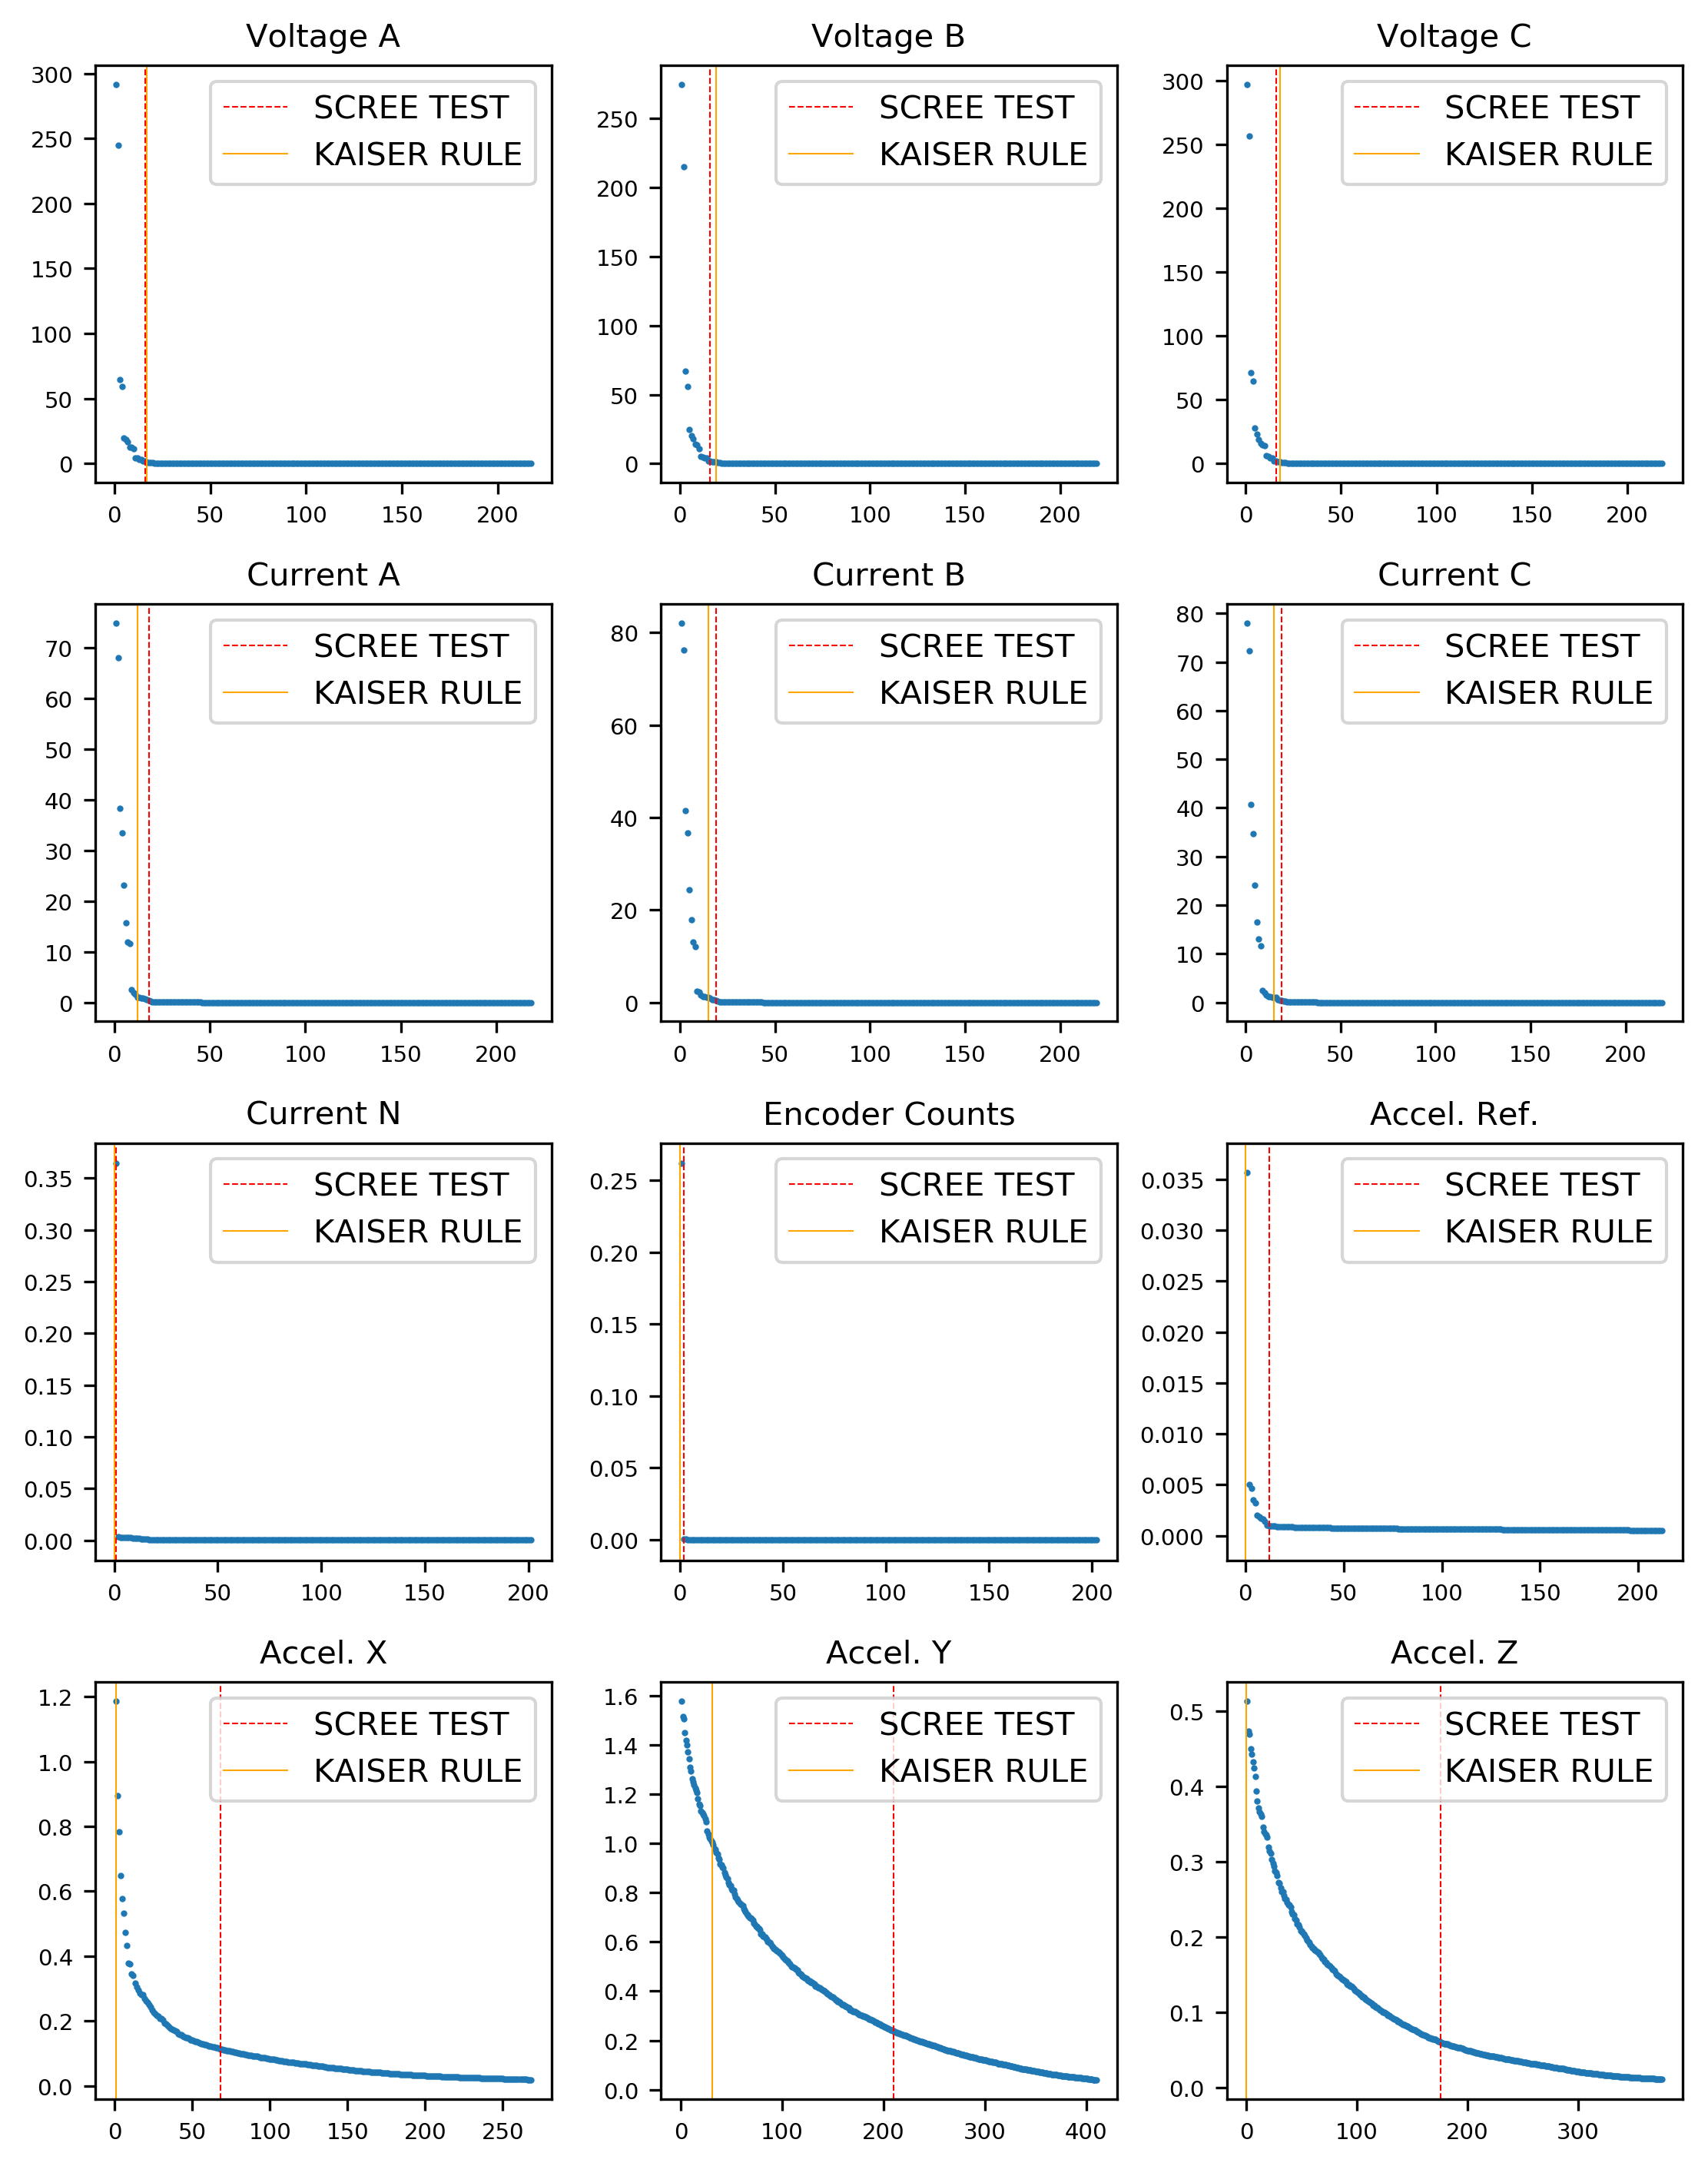

In [6]:
results_line = None
with (open(f"../results/pca/fitted_pcas_line_transient.pickle", "rb")) as f:
    results_line = pickle.load(f)
plot_eigenvalues(results_line)

In [7]:
tests(results_line)

,VA,VB,VC,CA,CB,CC,CN,EC,AR,AX,AY,AZ
test,,,,,,,,,,,,
SCREE,16,16,16,18,19,19,1,2,12,68,210,176
KAISER,17,19,18,12,15,15,0,0,0,1,31,0


#### Hyperparameter optimization with hyperopt

Since we have to apply PCA up to twelve times (one for each sensor), the proposed model have twelve parameters that correspond to the number of principal components to retain. Those parameters can be optimized. In this study Hyperopt with Tree of Parzen Estimators optimizer was used.

Hyperopt was run with the following configuration:
- Loss function to minimize: 1 - *model_accuracy*
- Number of iterations: 500

An hyperparameter optimization task was performed for each frequency (3 Hz, 30 Hz, direct supply).

##### 3 Hz

In [9]:
with(open(f"../results/hyperopt_three_transient.pickle", "rb")) as f:
    ho = pickle.load(f)
    bayes_trials = ho["trials"]
    btres = sorted(bayes_trials.results, key = lambda x: x['loss'])
    btres_minpcs = sorted(btres[:10], key = lambda x: np.sum(np.array(list(x['params'].values()))))
    best_minpcs = np.array([int(btres_minpcs[0]['params'][mag]) for mag in MAGS])
    print(f"LOSS: {btres_minpcs[0]['loss']}")
    print(f"PCAS TO RETAIN: {best_minpcs}")

LOSS: 0.07050000000000001
PCAS TO RETAIN: [ 4  7  8 33  5 19  6 35  1 17  2  2]


##### 30 Hz

In [10]:
with(open(f"../results/hyperopt_thirty_transient.pickle", "rb")) as f:
    ho = pickle.load(f)
    bayes_trials = ho["trials"]
    btres = sorted(bayes_trials.results, key = lambda x: x['loss'])
    btres_minpcs = sorted(btres[:10], key = lambda x: np.sum(np.array(list(x['params'].values()))))
    best_minpcs = np.array([int(btres_minpcs[0]['params'][mag]) for mag in MAGS])
    print(f"LOSS: {btres_minpcs[0]['loss']}")
    print(f"PCAS TO RETAIN: {best_minpcs}")

LOSS: 0.11160000000000003
PCAS TO RETAIN: [32  8  4 24  4 22 35 49  3  4  4 22]


##### Direct supply

In [11]:
with(open(f"../results/hyperopt_line_transient.pickle", "rb")) as f:
    ho = pickle.load(f)
    bayes_trials = ho["trials"]
    btres = sorted(bayes_trials.results, key = lambda x: x['loss'])
    btres_minpcs = sorted(btres[:10], key = lambda x: np.sum(np.array(list(x['params'].values()))))
    best_minpcs = np.array([int(btres_minpcs[0]['params'][mag]) for mag in MAGS])
    print(f"LOSS: {btres_minpcs[0]['loss']}")
    print(f"PCAS TO RETAIN: {best_minpcs}")

LOSS: 0.09850000000000003
PCAS TO RETAIN: [ 6 25 46  2 10  8  2 10 16 38 33 17]


##### Conclusions

The number of retained components obtained with the 3 Hz data set, besides it has the better performance (in terms of loss), it retains the less number of components of the three frequencies (139). That combination will be tested with the others frequencies in the next experiments.

#### Evaluating the optimal number of components to retain (Scree vs K1 vs Hyperopt)

After the evaluation, we saw that the models using the principal components selected by Kaiser's rule outperformed those selected with Scree test. Also, the Hyperopt results are clearly better than Kaiser's and Scree, and specifically the 3HZ combination performed the best in all cases.
Furthermore, the selected combination of principal components to retain for the rest of the study is:

| VA | VB | VC | CA | CB | CC | CN | EC | AR | AX | AY | AZ | TOTAL |
|----|----|----|----|----|----|----|----|----|----|----|----|-------|
| 4 | 7 | 8 | 33 | 5 | 19 | 6 | 35 | 1 | 17 | 2 | 2 | 139 |

In [12]:
npcas_scree = [
    [17,18,18,18,18,17,5,2,11,43,189,105],
    [15,18,18,16,17,17,3,1,9,83,171,151],
    [16,16,16,18,19,19,1,2,12,68,210,176]
]
npcas_kaiser = [
    [26,28,30,14,15,14,1,1,1,1,4,1],
    [18,18,18,14,1,14,1,1,1,1,9,1],
    [17,19,18,12,15,15,1,1,1,1,31,1]
]
npcas_hyperopt = [
    [4,7,8,33,5,19,6,35,1,17,2,2],
    [32,8,4,24,4,22,35,49,3,4,4,22],
    [6,25,46,2,10,8,2,10,16,38,33,17]
]

scree_evals = []
kaiser_evals = []
hyperopt_evals = []
best_hyperopt_evals = []

for k, freq in {0: ds.FREQ_3HZ, 1: ds.FREQ_30HZ, 2: ds.FREQ_LINE}.items():
    X, Y = ds.data_window(5, ds.ALL, freq, ds.MASK_NO_GND, True, False, ROOT_PATH)
    _, scree = efc.build_pca_dt(X, Y, npcas_scree[k])
    _, kaiser = efc.build_pca_dt(X, Y, npcas_kaiser[k])
    _, hyperopt = efc.build_pca_dt(X, Y, npcas_hyperopt[k])
    _, best_hyperopt = efc.build_pca_dt(X, Y, npcas_hyperopt[0])
    scree_evals.append(np.mean(np.mean(scree, axis=0), axis=0))
    kaiser_evals.append(np.mean(np.mean(kaiser, axis=0), axis=0))
    hyperopt_evals.append(np.mean(np.mean(hyperopt, axis=0), axis=0))
    best_hyperopt_evals.append(np.mean(np.mean(best_hyperopt, axis=0), axis=0))
    
print("3HZ / SCREE")
print(scree_evals[0])
print("3HZ / KAISER")
print(kaiser_evals[0])
print("3HZ / HYPEROPT")
print(hyperopt_evals[0])
print("")
print("30HZ / SCREE")
print(scree_evals[1])
print("30HZ / KAISER")
print(kaiser_evals[1])
print("30HZ / HYPEROPT")
print(hyperopt_evals[1])
print("30HZ / BEST HYPEROPT COMBINATION (3HZ)")
print(best_hyperopt_evals[1])
print("")
print("DIRECT SUPPLY / SCREE")
print(scree_evals[2])
print("DIRECT SUPPLY / KAISER")
print(kaiser_evals[2])
print("DIRECT SUPPLY / HYPEROPT")
print(hyperopt_evals[2])
print("DIRECT SUPPLY / BEST HYPEROPT COMBINATION (3HZ)")
print(best_hyperopt_evals[2])
print("")

print("MEAN ACCURACIES OF THE THREE FREQUENCIES")
print(f"SCREE: {np.mean(np.array(scree_evals)[:,2])}")
print(f"KAISER: {np.mean(np.array(kaiser_evals)[:,2])}")
print(f"HYPEROPT: {np.mean(np.array(hyperopt_evals)[:,2])}")
print(f"BEST HYPEROPT COMBINATION (3HZ): {np.mean(np.array(best_hyperopt_evals)[:,2])}")

3HZ / SCREE
[0.89027  0.891485 0.809397 0.120159 0.10208  0.190603]
3HZ / KAISER
[0.897012 0.898225 0.81731  0.109523 0.096561 0.18269 ]
3HZ / HYPEROPT
[0.934038 0.93519  0.893153 0.069607 0.060856 0.106847]

30HZ / SCREE
[0.835147 0.83797  0.742704 0.176443 0.153722 0.257296]
30HZ / KAISER
[0.877888 0.879302 0.814895 0.124647 0.114378 0.185105]
30HZ / HYPEROPT
[0.909914 0.912095 0.87362  0.093611 0.083571 0.12638 ]
30HZ / BEST HYPEROPT COMBINATION (3HZ)
[0.917272 0.91898  0.886424 0.083801 0.076843 0.113576]

DIRECT SUPPLY / SCREE
[0.886897 0.888018 0.800284 0.127444 0.10496  0.199716]
DIRECT SUPPLY / KAISER
[0.892477 0.893323 0.819124 0.120563 0.099497 0.180876]
DIRECT SUPPLY / HYPEROPT
[0.929896 0.930851 0.881935 0.076191 0.064555 0.118065]
DIRECT SUPPLY / BEST HYPEROPT COMBINATION (3HZ)
[0.930597 0.931636 0.886127 0.070996 0.063988 0.113873]

MEAN ACCURACIES OF THE THREE FREQUENCIES
SCREE: 0.7841283333333333
KAISER: 0.8171096666666666
HYPEROPT: 0.8829026666666667
BEST HYPEROPT COMB

### Results

The results are provided through confusion matrices showing the performance of the models for each combination of failures. We have used transient data of the 5 first seconds of IM operation.

Ten models were trained for the data sets for each frequency (3 Hz, 30 Hz, and direct supply), and then the results are the sum of the predictions for the then sub-data sets used for test. (i.e. 10 fold cross validation).

#### 3 Hz

The sub-data set of 3 Hz contains 831 instances.

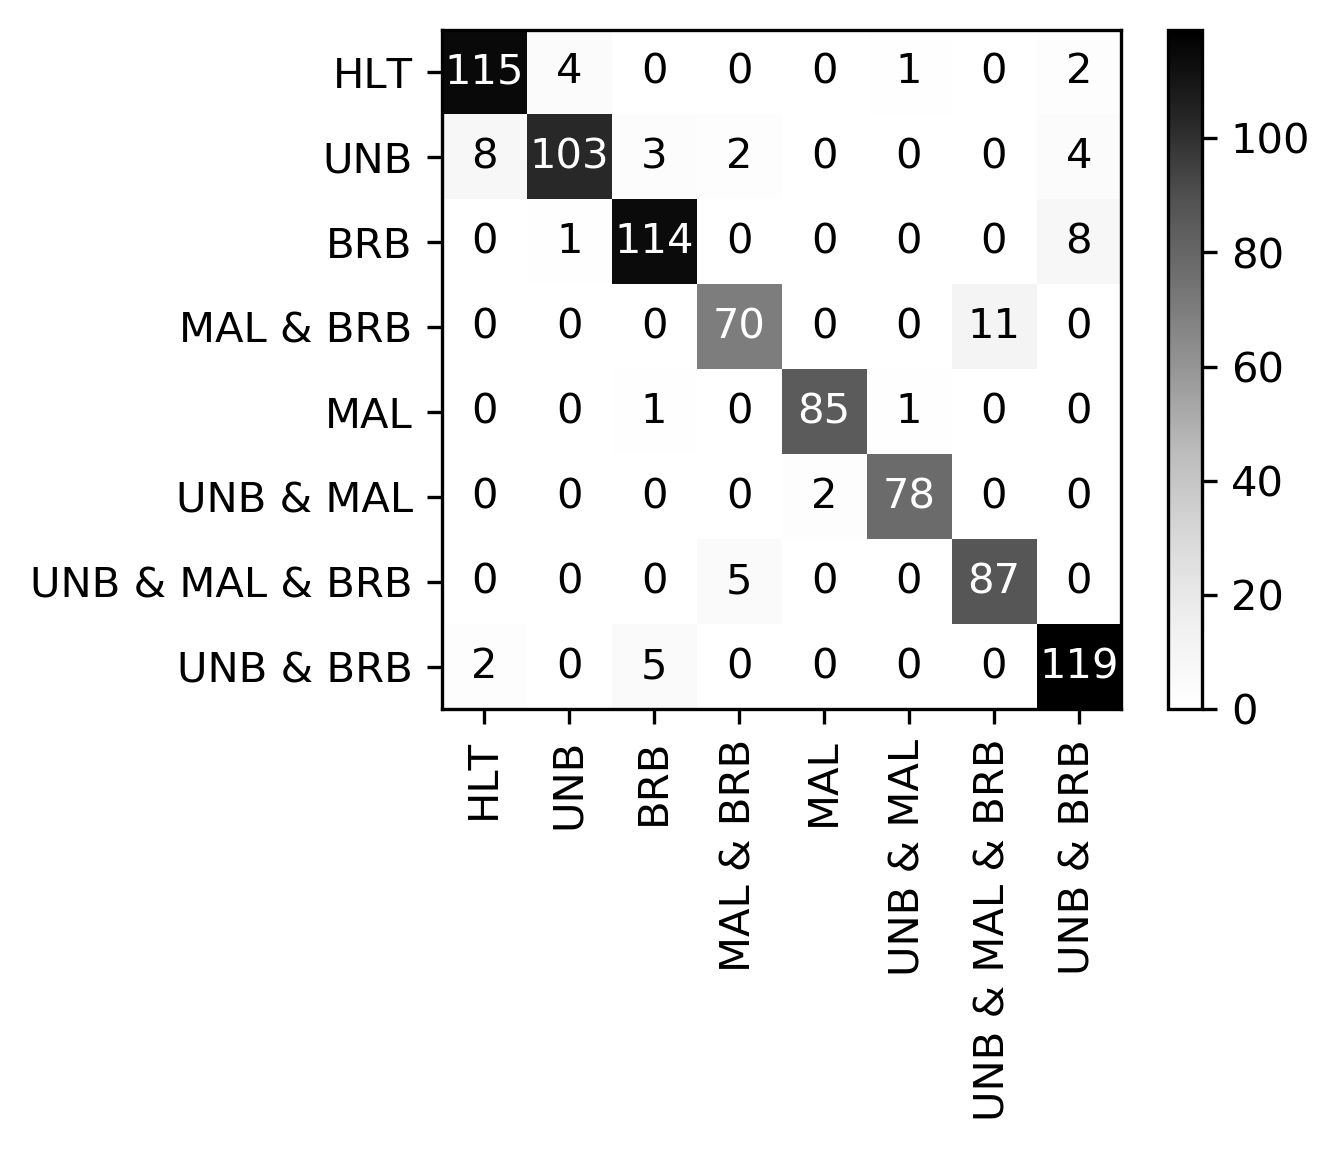

In [13]:
X, Y = ds.data_window(5, ds.ALL, ds.FREQ_3HZ, ds.MASK_NO_GND, True, False, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, FAILURES, "3hz_transient_5")

#### 30 Hz

The sub-data set of 30 Hz contains 833 instances.

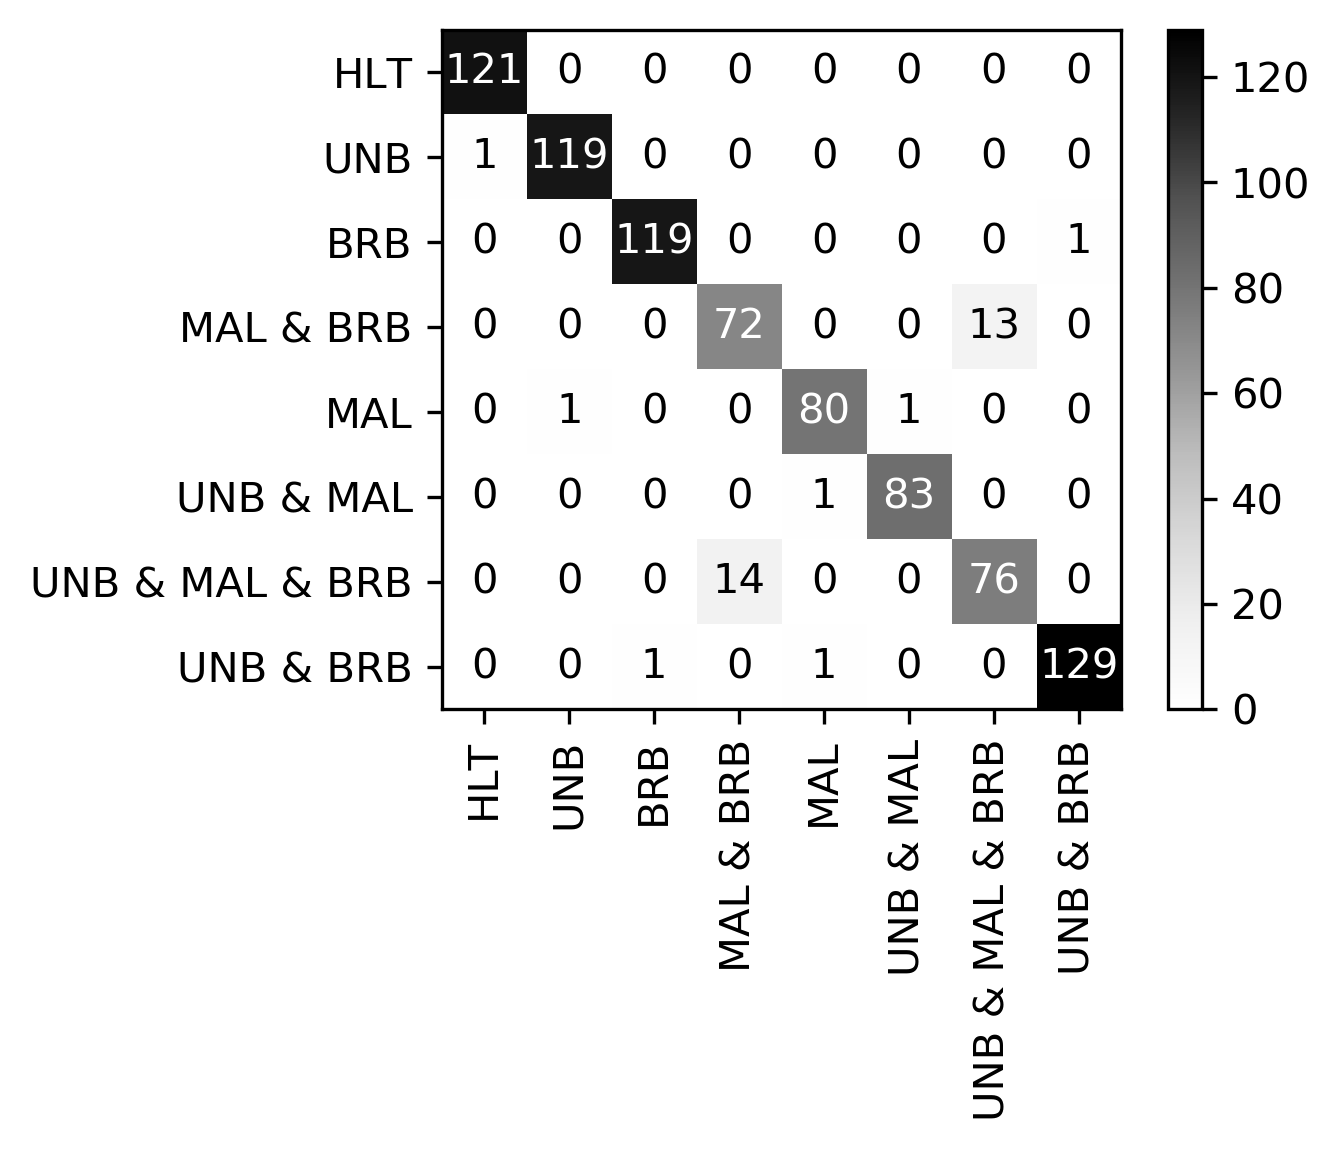

In [14]:
X, Y = ds.data_window(5, ds.ALL, ds.FREQ_30HZ, ds.MASK_NO_GND, True, False, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, FAILURES, "30hz_transient_5")

#### Direct supply

The sub-data set of direct supply contains 857 instances.

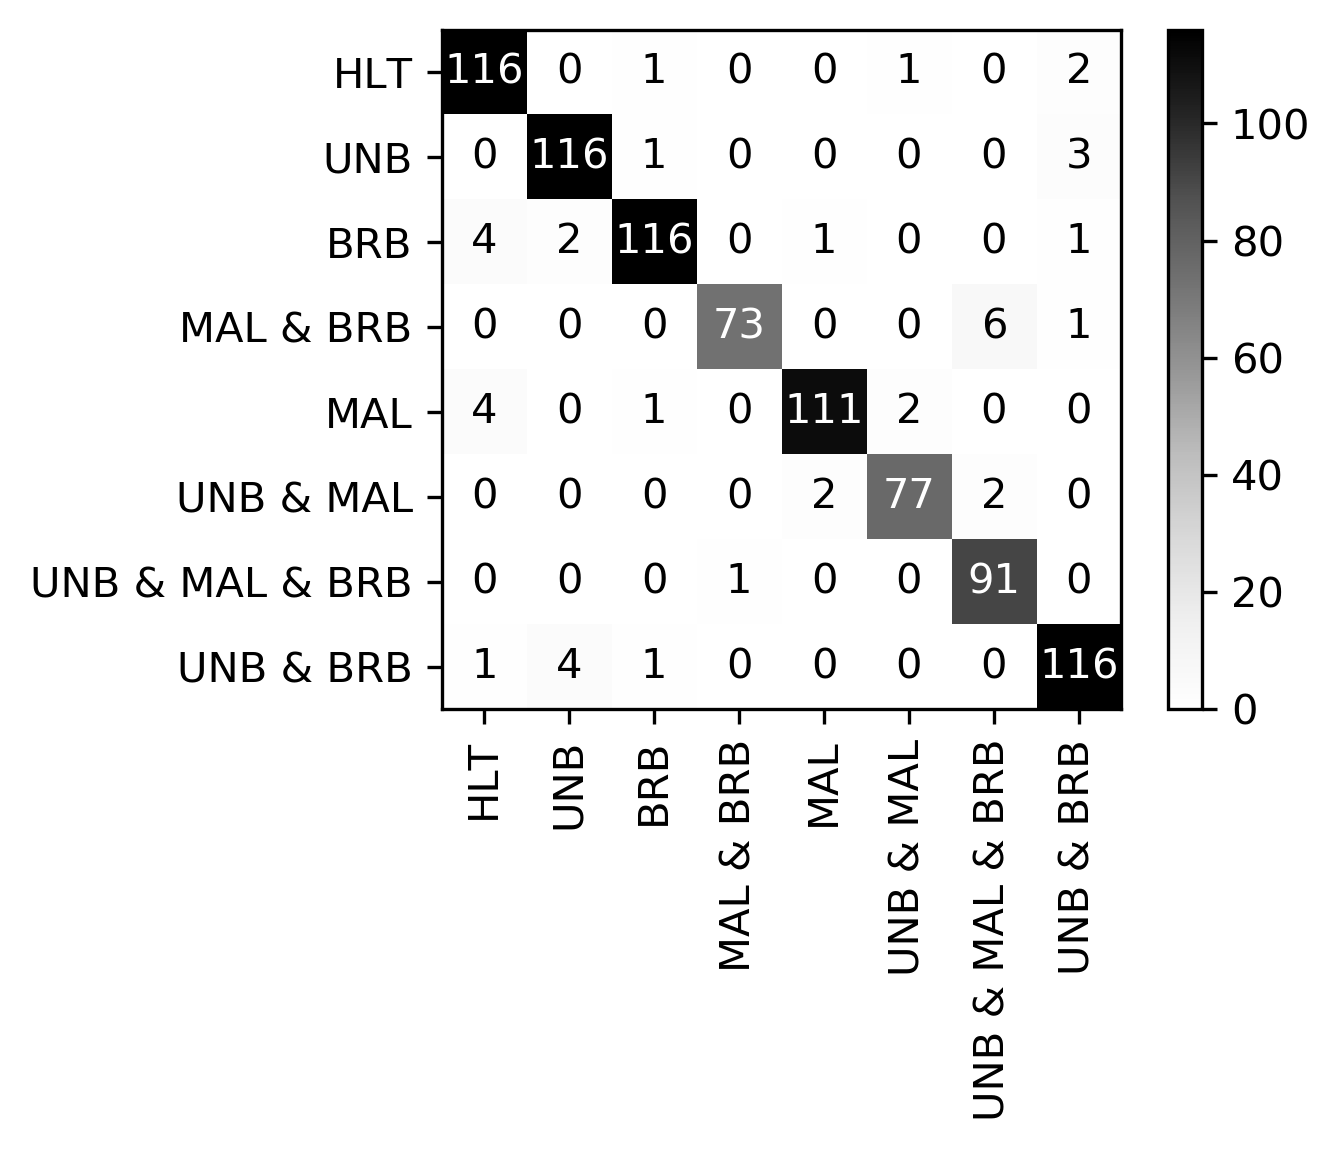

In [15]:
X, Y = ds.data_window(5, ds.ALL, ds.FREQ_LINE, ds.MASK_NO_GND, True, False, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, FAILURES, "line_transient_5")

#### Frequency insensitive (3Hz + 30Hz + Direct Supply)

The sub-data set of the combination of all frequencies contains 2521 instances.

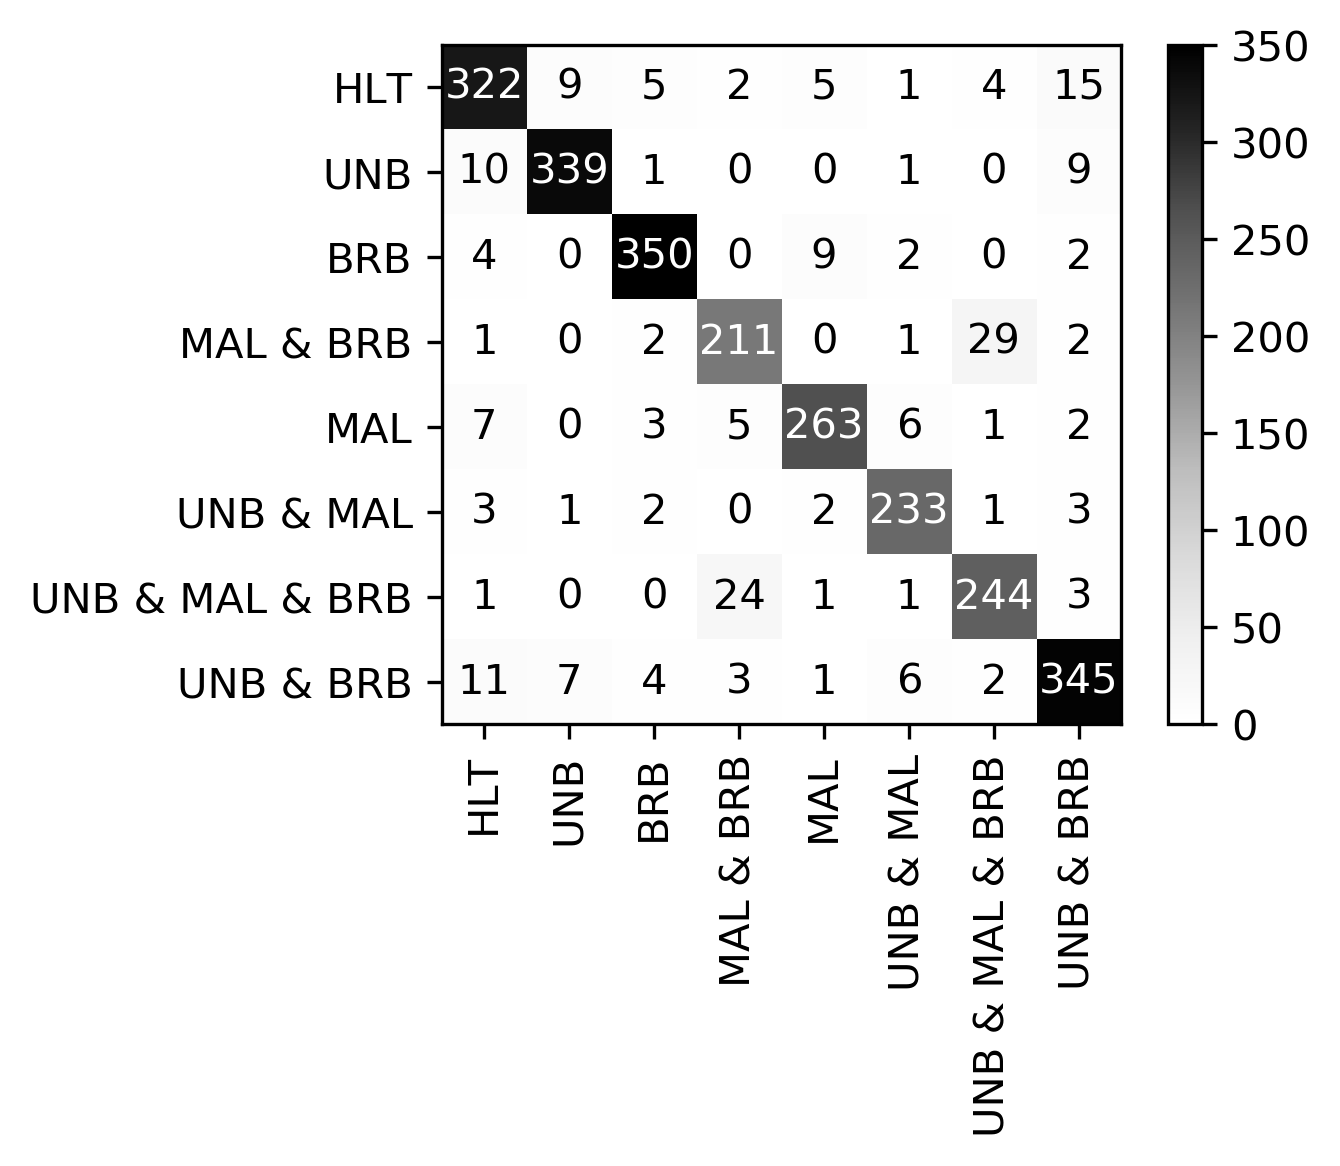

In [16]:
X, Y = ds.data_window(5, ds.ALL, ds.FREQ_ALL_PAPER, ds.MASK_NO_GND, True, False, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, FAILURES, "all_transient_5")

### Can we diagnose faults even earlier? Reducing the time interval

We want to know if our early fault diagnosis method can be an extremely early one. For this purpose we are going to evaluate the models using different amounts of data.

Hence, in this part of the experimentation we are going to train models with different time intervals, starting from 0.01 seconds and ending with 5. The time intervals used are:

- 0.01s
- 0.02s
- 0.05s
- 0.1s
- 0.2s
- 0.5s
- 0.75s
- 1s
- 2s
- 5s

In [20]:
#time_interval_results[0] -> 3 Hz
#time_interval_results[1] -> 30 Hz
#time_interval_results[2] -> Direct Supply
#time_interval_results[3] -> All frequencies

sizes = (1, 2, 5, 10, 20, 50, 75, 100, 200, 500)
freqs = ("three", "thirty", "line", "all_paper")
time_interval_results = []
for freq in freqs:
        row = []
        for size in sizes:
            res = pd.read_csv(f"../results/window_size/window_size_{freq}_transient_{size}.csv", header=None).values
            mean = np.around(np.mean(res, axis=0), 4)
            minv = np.around(np.min(res, axis=0), 4)
            maxv = np.around(np.max(res, axis=0), 4)
            row.append(np.array([mean, minv, maxv]).T)
        time_interval_results.append(np.array(row))
time_interval_results = np.array(time_interval_results)

#### Different time intervals results

The rows correspond to the time interval 10 rows (from 0.01 to 5 seconds) while the columns correspond to each multi-label metric, from left to right (F1 macro, F1 micro, Accuracy, Ranking Loss, Hamming Loss, Zero-One Loss).

With the aim of knowing what time intervals produce significantly worse results than the best time interval, a Hochberg Ranking was performed. The results of the ranking are that the time intervals of 0.5s, 0.75s, 1s, 2s and 5s are statistically equivalents, which means that our models perform quite good when using only the first 10% measures of the whole IM start.

##### 3 Hz

In [17]:
print(time_interval_results[0][:,:,0])

[[0.8746 0.8738 0.7493 0.1373 0.1214 0.2507]
 [0.8946 0.8924 0.7807 0.1229 0.1027 0.2193]
 [0.9173 0.9169 0.8346 0.1094 0.0782 0.1654]
 [0.9308 0.931  0.8687 0.0959 0.0651 0.1313]
 [0.9486 0.9478 0.8953 0.0748 0.0491 0.1047]
 [0.9538 0.9539 0.9115 0.0655 0.0433 0.0885]
 [0.9548 0.9547 0.9169 0.0652 0.0429 0.0831]
 [0.954  0.9539 0.9182 0.063  0.0439 0.0818]
 [0.9695 0.97   0.9464 0.0426 0.0285 0.0536]
 [0.9751 0.9737 0.936  0.0382 0.0249 0.064 ]]


##### 30 Hz

In [18]:
print(time_interval_results[1][:,:,0])

[[0.8427 0.8484 0.7221 0.1999 0.1436 0.2779]
 [0.8795 0.8838 0.7845 0.171  0.1106 0.2155]
 [0.8733 0.878  0.7754 0.1796 0.1164 0.2246]
 [0.914  0.9174 0.8569 0.1158 0.0787 0.1431]
 [0.9107 0.9143 0.851  0.1187 0.0815 0.149 ]
 [0.9748 0.9749 0.9455 0.0353 0.0239 0.0545]
 [0.976  0.9753 0.9424 0.0326 0.0235 0.0576]
 [0.9774 0.9767 0.9436 0.0299 0.0221 0.0564]
 [0.9815 0.9803 0.9516 0.0212 0.0189 0.0484]
 [0.9838 0.9833 0.9548 0.026  0.016  0.0452]]


##### Direct supply

In [19]:
print(time_interval_results[2][:,:,0])

[[0.8531 0.8551 0.6978 0.174  0.1367 0.3022]
 [0.8875 0.8896 0.7616 0.1578 0.1034 0.2384]
 [0.9093 0.9107 0.8226 0.1109 0.0833 0.1774]
 [0.9229 0.9238 0.8357 0.1029 0.0713 0.1643]
 [0.9319 0.9323 0.8555 0.0882 0.0632 0.1445]
 [0.9546 0.9544 0.9019 0.0618 0.0425 0.0981]
 [0.96   0.9603 0.92   0.0539 0.037  0.08  ]
 [0.9633 0.9637 0.9272 0.0416 0.0339 0.0728]
 [0.9644 0.9647 0.9294 0.0458 0.033  0.0706]
 [0.9818 0.9817 0.9584 0.0268 0.0171 0.0416]]


##### Frequency insensitive (3Hz + 30Hz + Direct Supply)

In [21]:
print(time_interval_results[3][:,:,0])

[[0.8655 0.8678 0.7491 0.1826 0.1233 0.2509]
 [0.8746 0.8764 0.7607 0.1741 0.1162 0.2393]
 [0.8952 0.8964 0.8004 0.1432 0.0978 0.1996]
 [0.9024 0.9032 0.8104 0.1284 0.0914 0.1896]
 [0.9107 0.9113 0.8301 0.1224 0.0836 0.1699]
 [0.9374 0.9377 0.8757 0.0847 0.0589 0.1243]
 [0.945  0.9455 0.891  0.0812 0.0513 0.109 ]
 [0.9323 0.9321 0.8654 0.0884 0.0639 0.1346]
 [0.9579 0.9576 0.9081 0.0562 0.0399 0.0919]
 [0.9595 0.9591 0.9159 0.05   0.0387 0.0841]]


##### Graphical representation of the results

The performance evolution depending on the time interval is plotted below for the direct supply frequency.

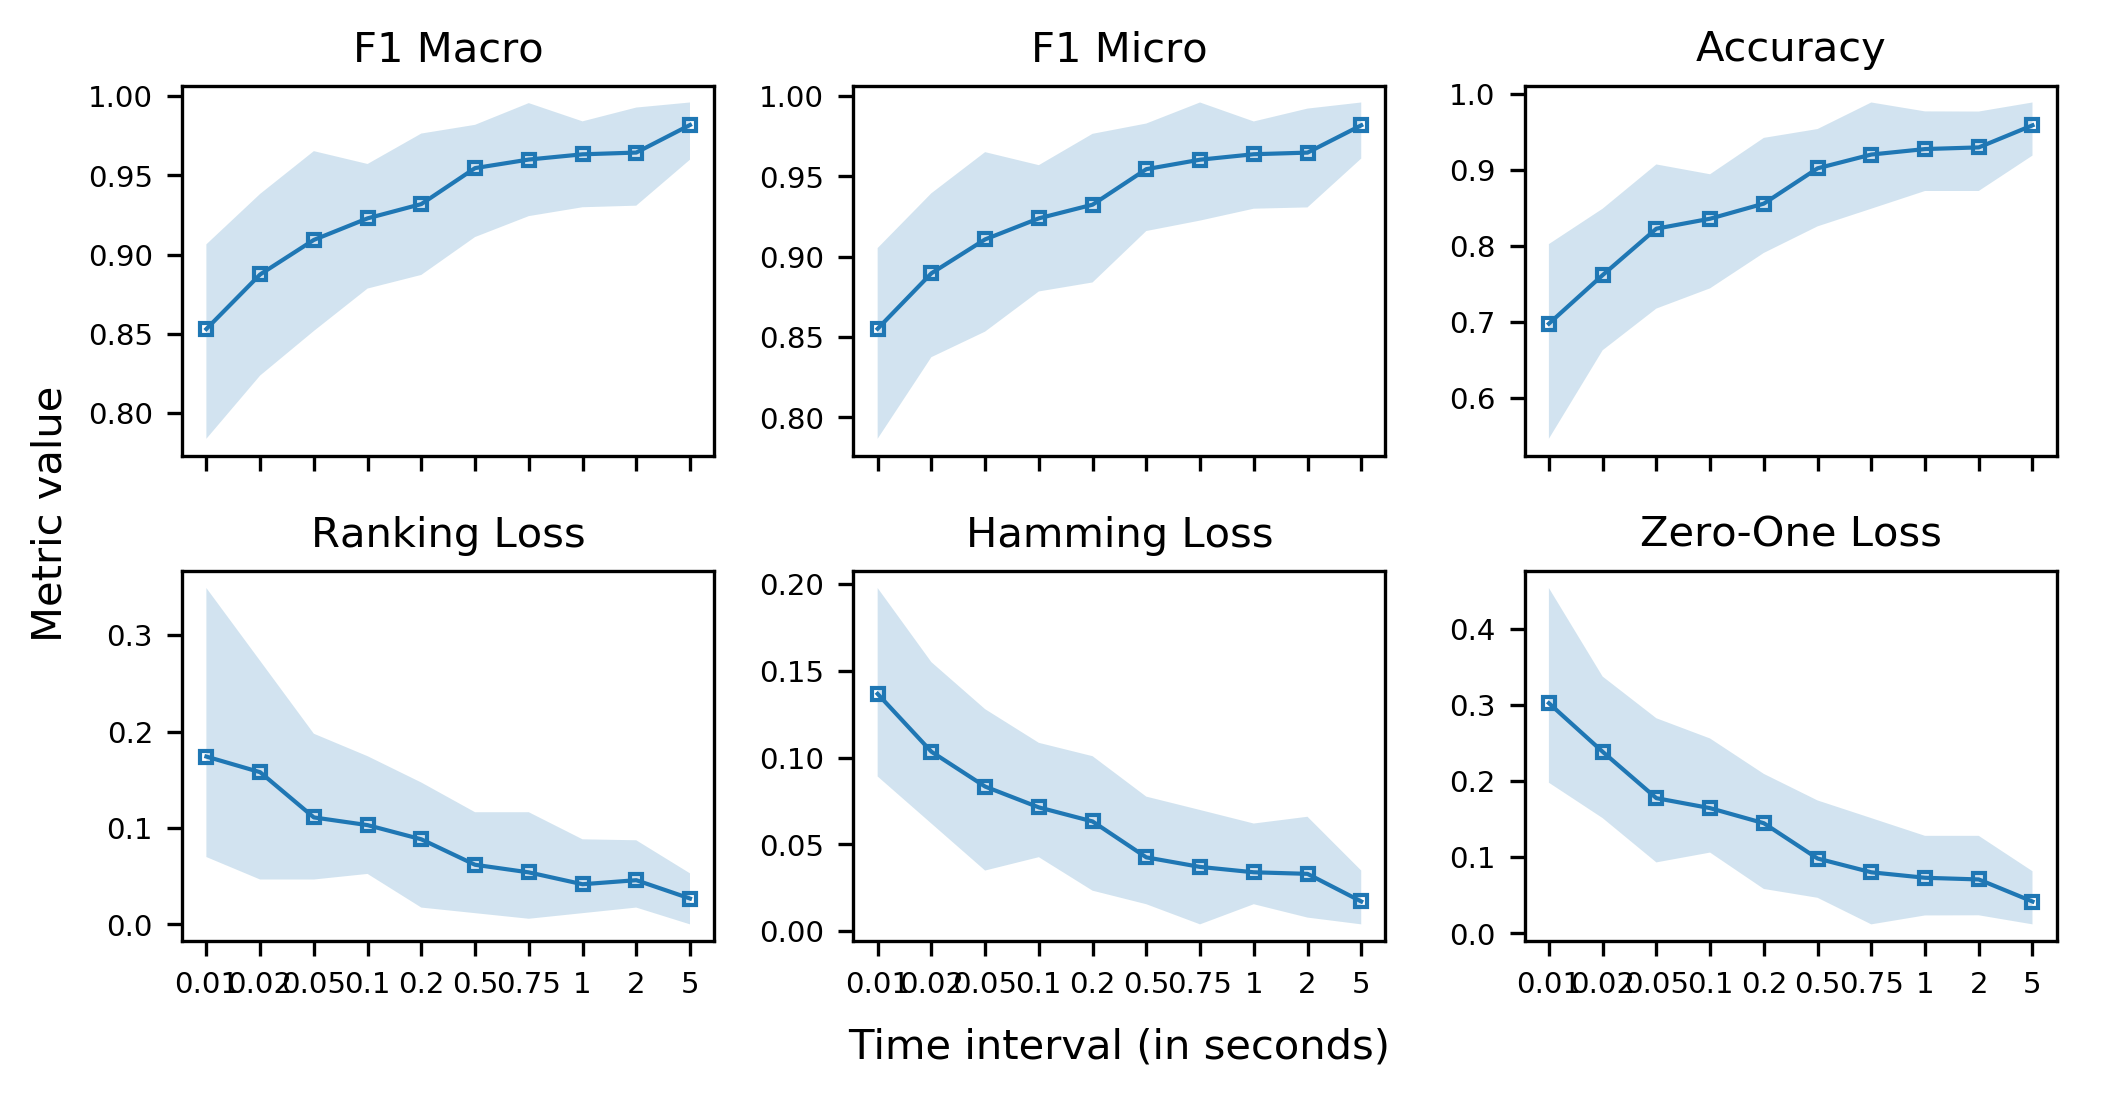

In [22]:
plot_multilabel_metrics(time_interval_results[2])

##### Confusion matrices of 0.5s time interval

###### 3 Hz

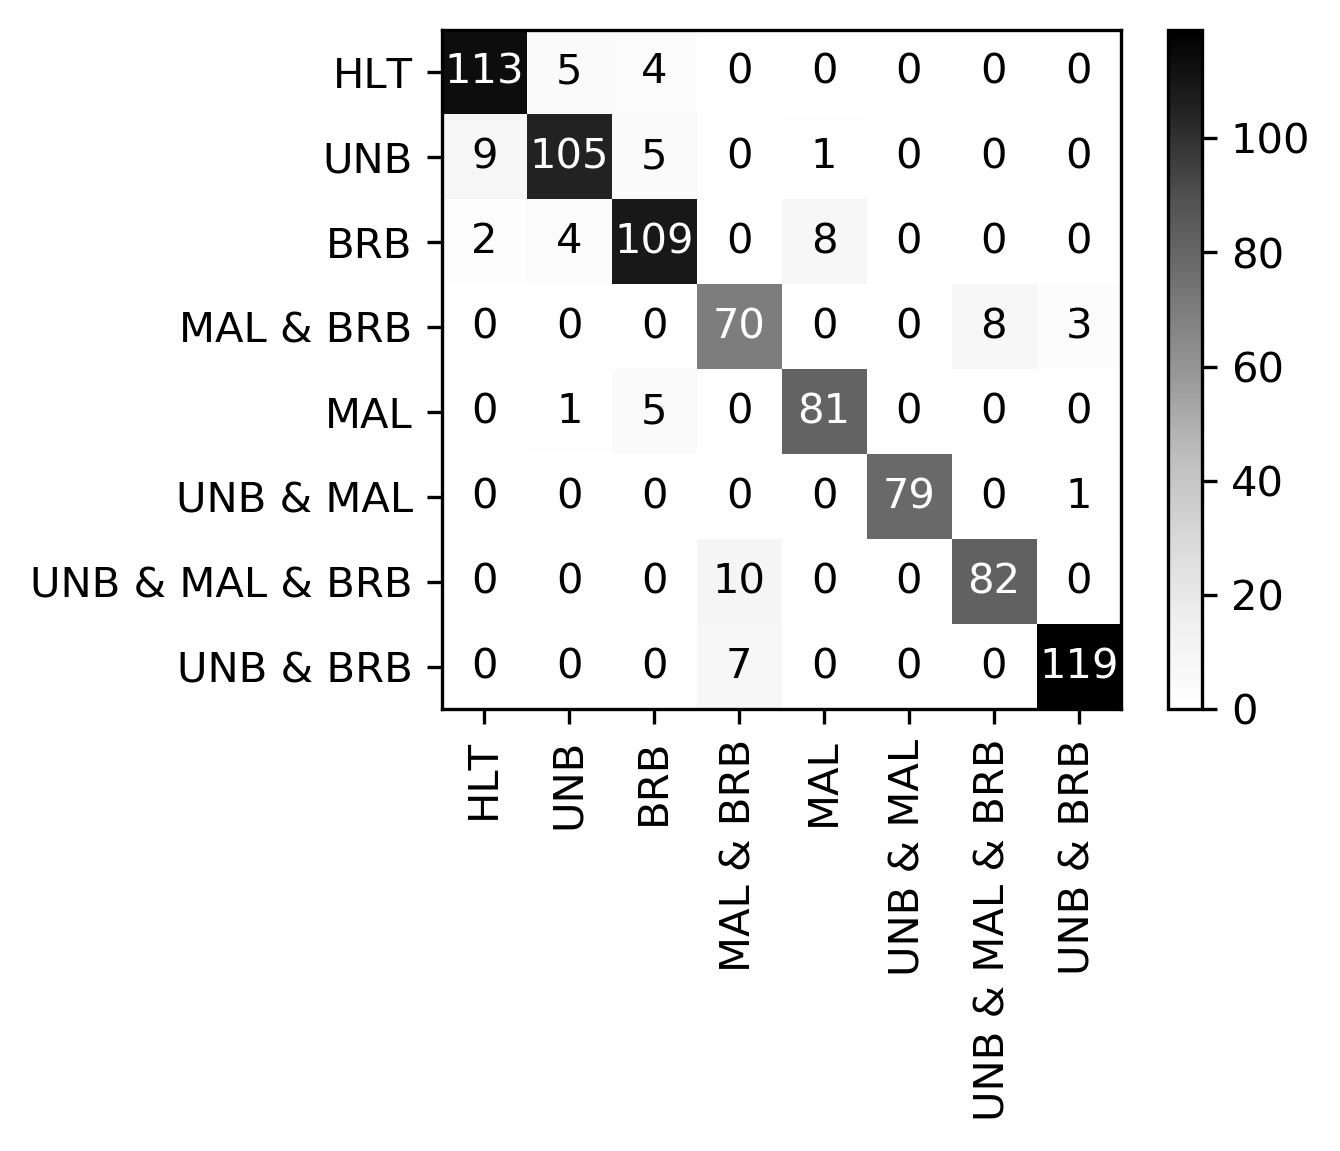

In [21]:
X, Y = ds.data_window(0.5, ds.ALL, ds.FREQ_3HZ, ds.MASK_NO_GND, True, False, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=1))
dt = DecisionTreeClassifier(random_state=1)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, FAILURES, "3hz_transient_05")

###### 30 Hz

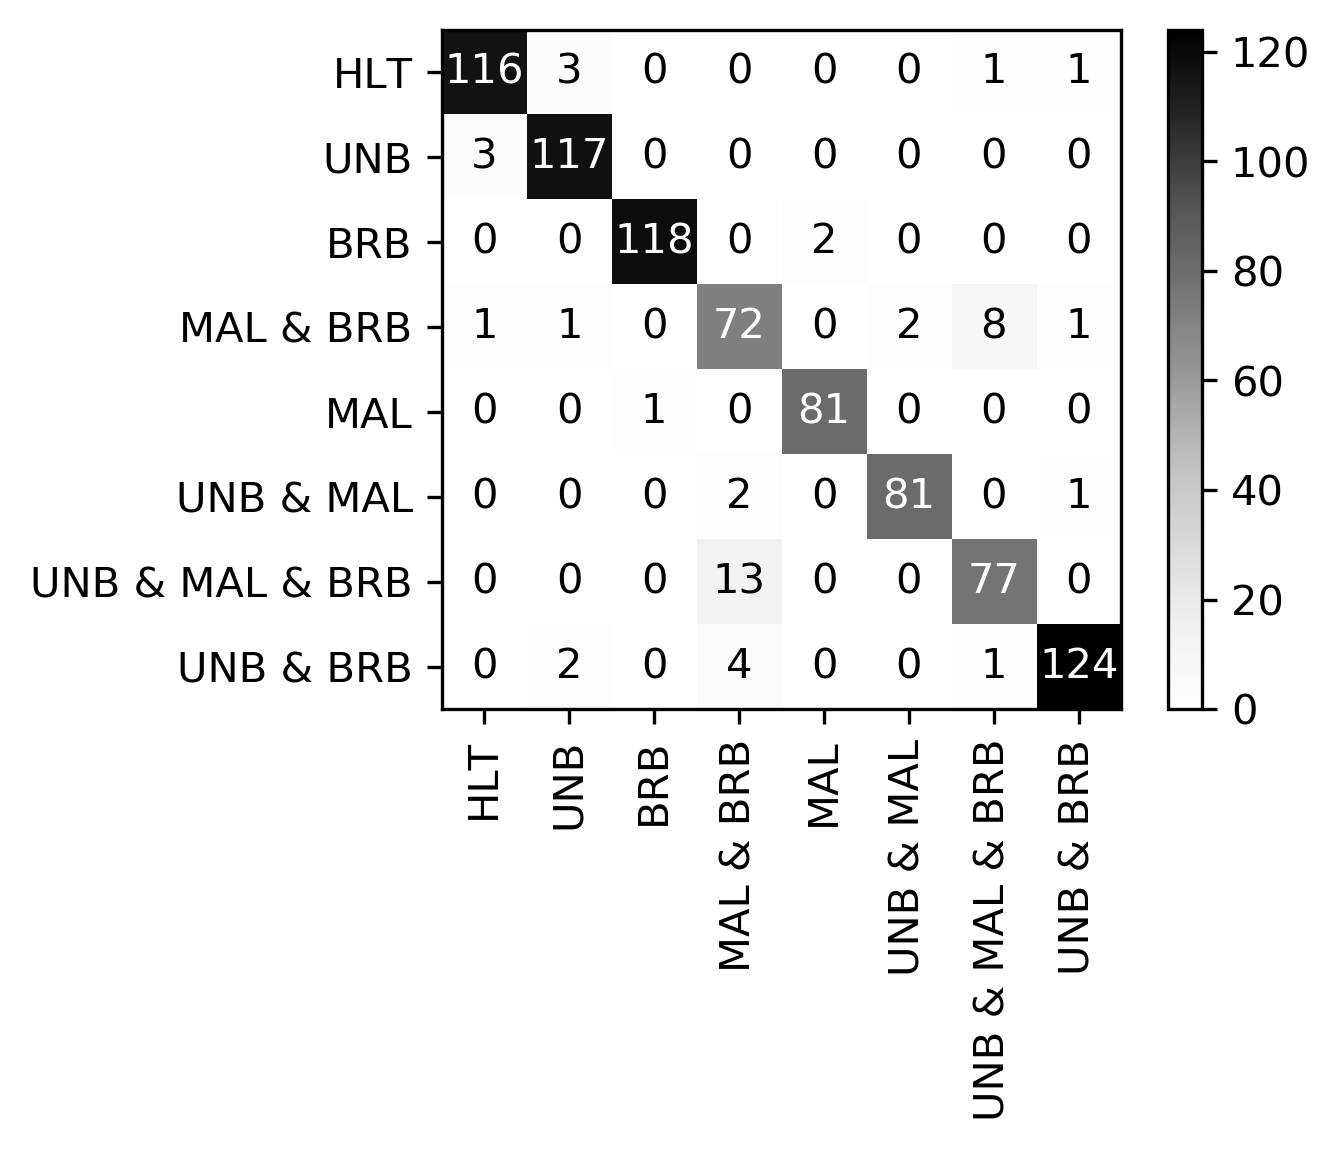

In [22]:
X, Y = ds.data_window(0.5, ds.ALL, ds.FREQ_30HZ, ds.MASK_NO_GND, True, False, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components))
dt = DecisionTreeClassifier(random_state=1)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, FAILURES, "30hz_transient_05")

###### Direct supply

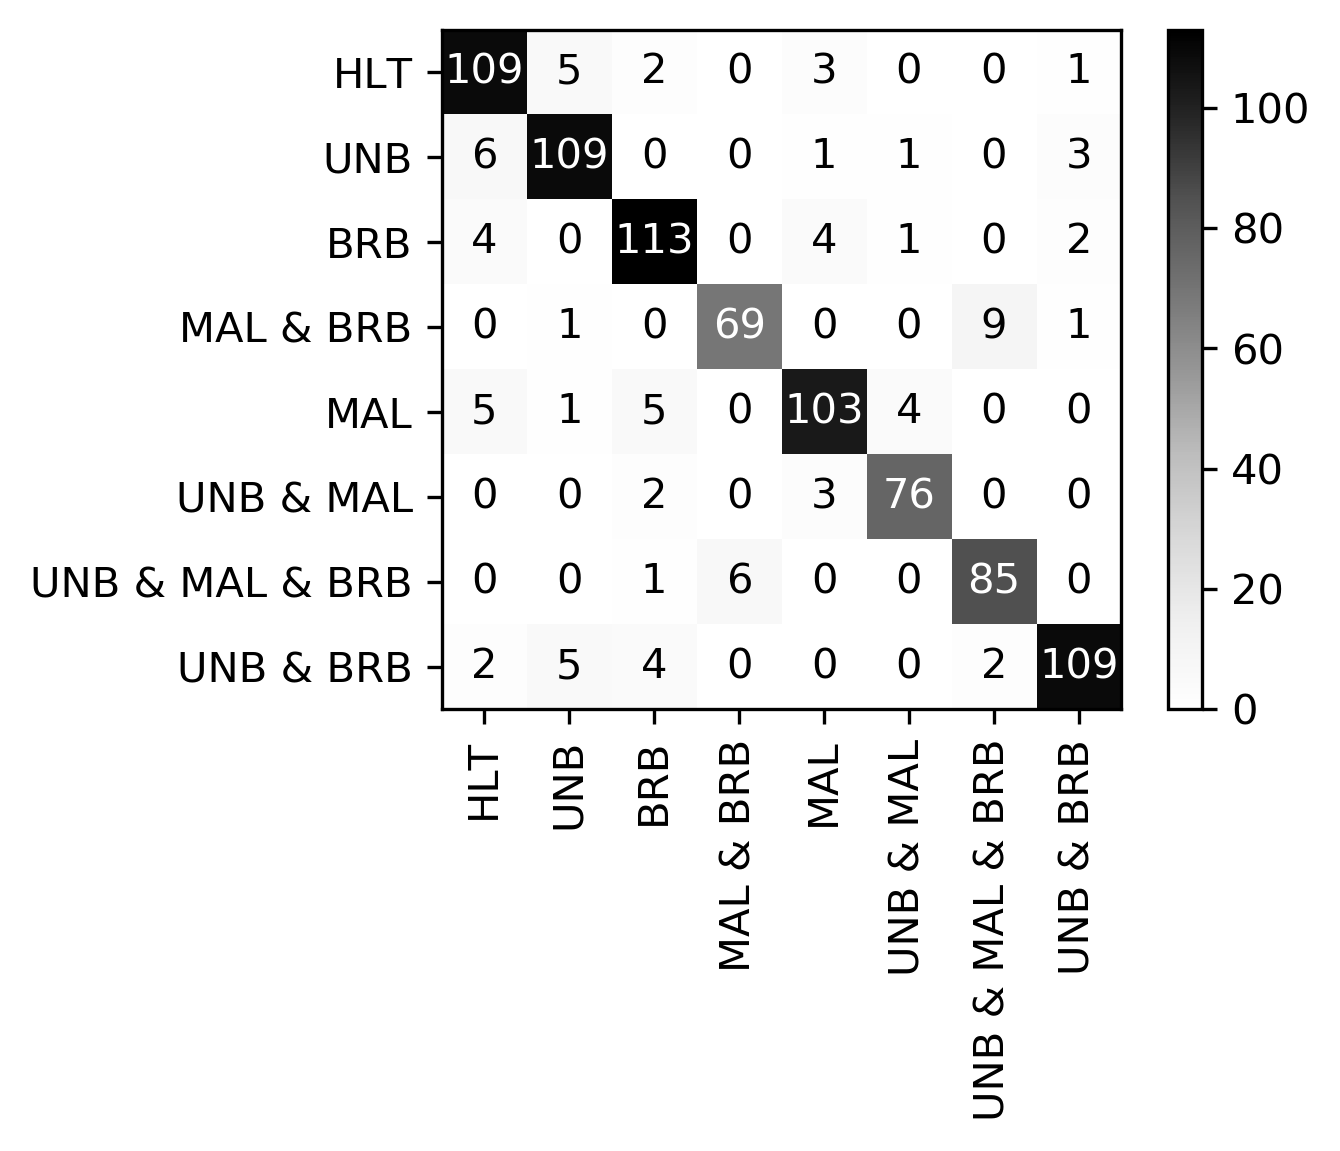

In [23]:
X, Y = ds.data_window(0.5, ds.ALL, ds.FREQ_LINE, ds.MASK_NO_GND, True, False, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components))
dt = DecisionTreeClassifier(random_state=1)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, FAILURES, "line_transient_05")

###### Frequency insensitive (3Hz + 30Hz + Direct Supply)

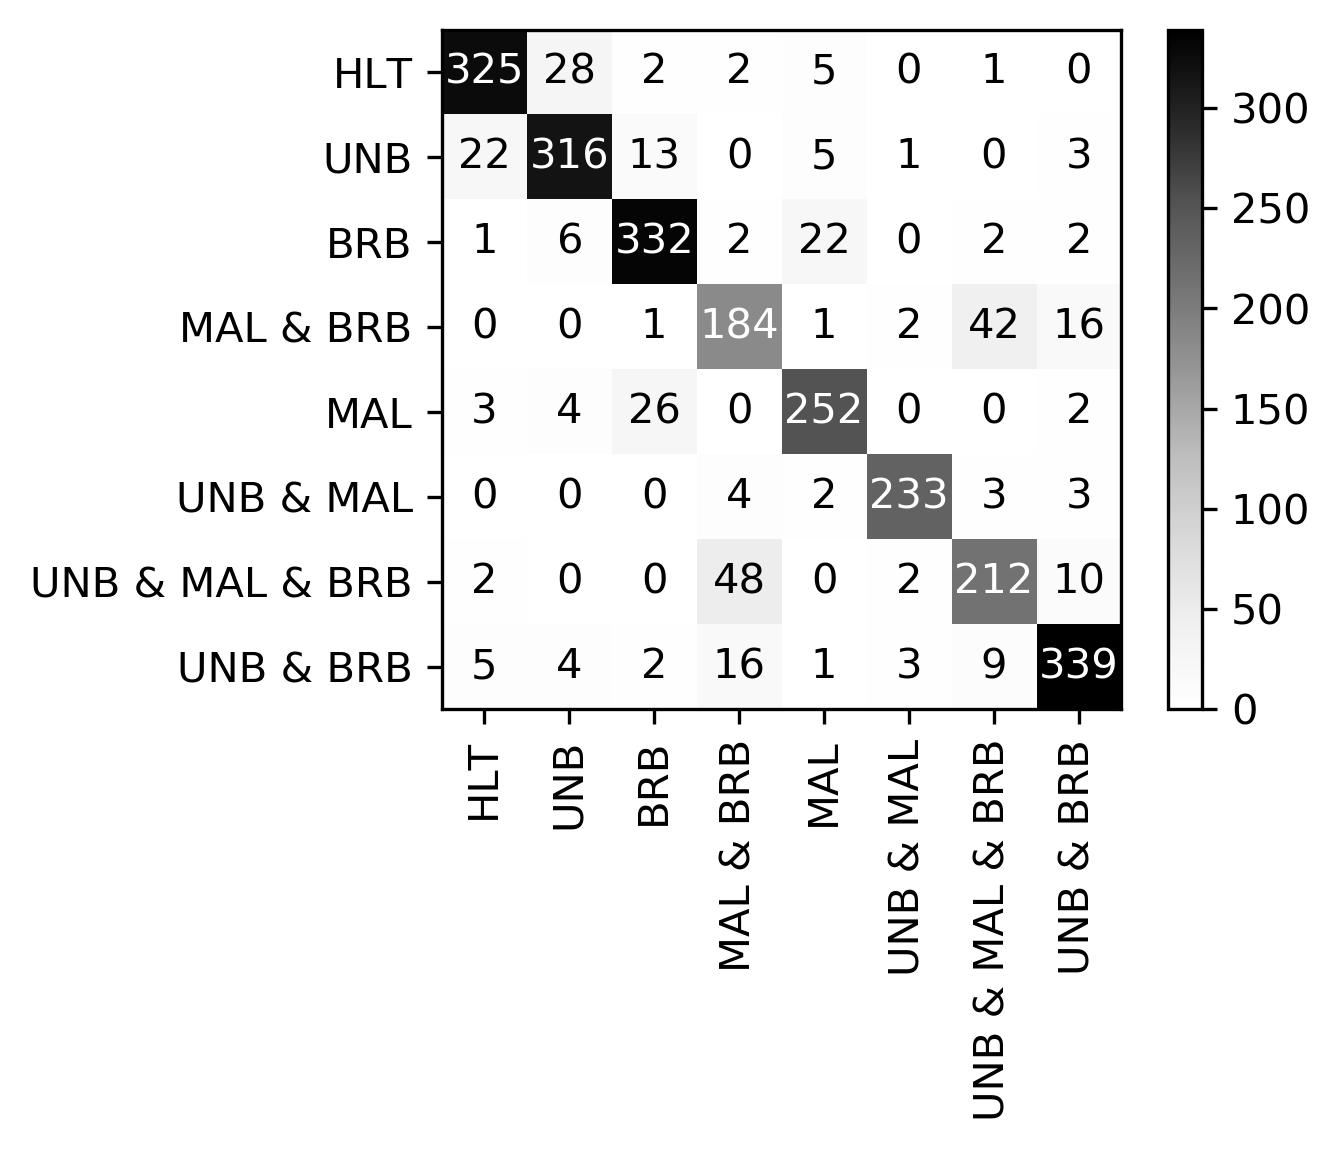

In [23]:
X, Y = ds.data_window(0.5, ds.ALL, ds.FREQ_ALL_PAPER, ds.MASK_NO_GND, True, False, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components))
dt = DecisionTreeClassifier(random_state=1)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, FAILURES, "all_transient_05")

#### Experiments with Bearing Defect fault

##### 3 Hz Full transient state

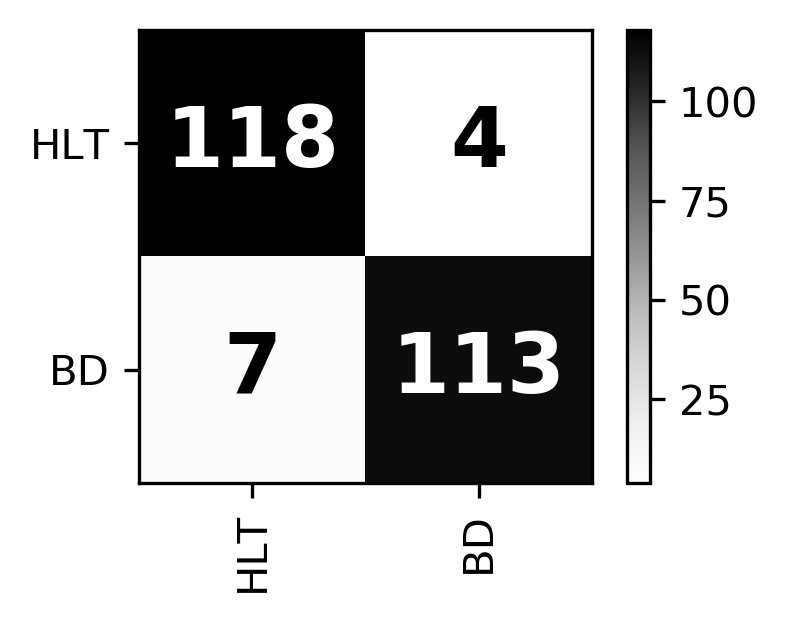

In [24]:
X, Y = ds.data_window(5, ds.ALL, ds.FREQ_3HZ, ds.MASK_NO_GND, True, True, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, BIN_FAILURES, "3hz_transient_5_bd")

##### 30 Hz Full transient state

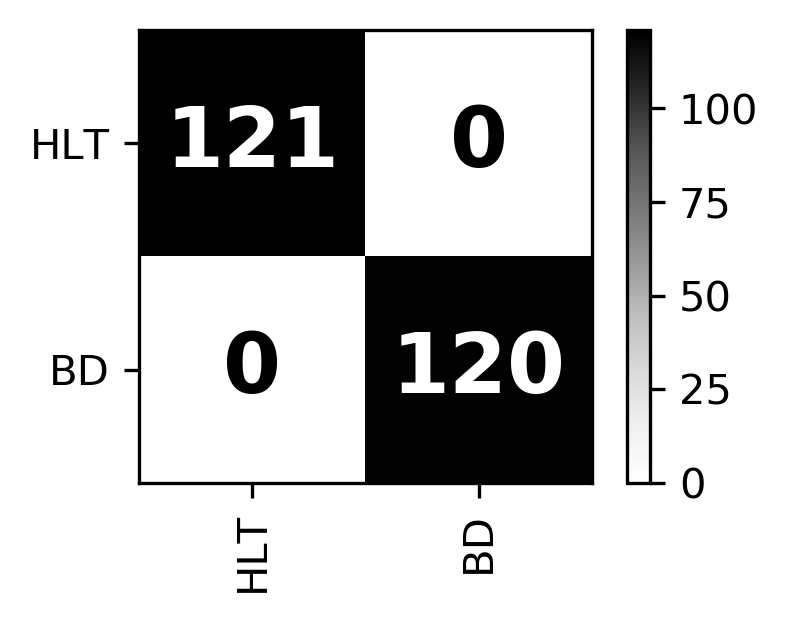

In [25]:
X, Y = ds.data_window(5, ds.ALL, ds.FREQ_30HZ, ds.MASK_NO_GND, True, True, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, BIN_FAILURES, "30hz_transient_5_bd")

##### Direct supply Full transient state

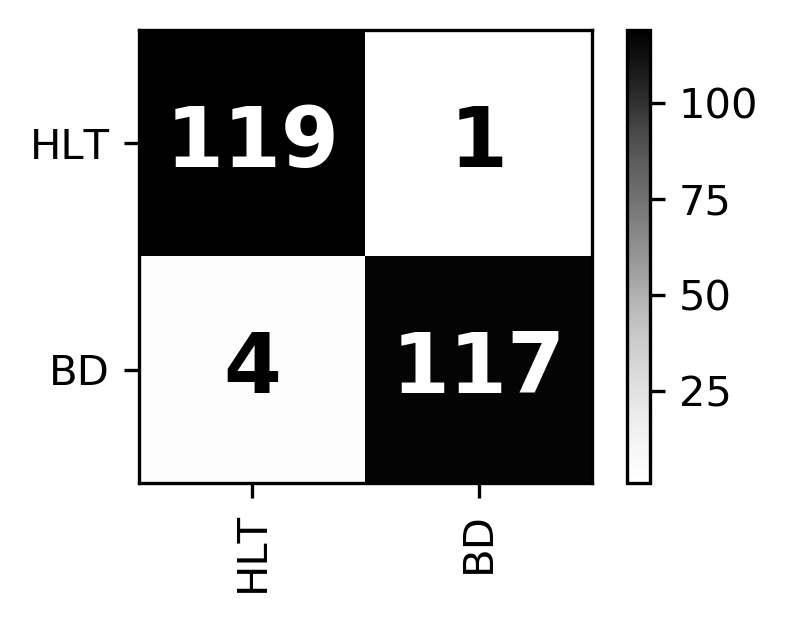

In [26]:
X, Y = ds.data_window(5, ds.ALL, ds.FREQ_LINE, ds.MASK_NO_GND, True, True, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, BIN_FAILURES, "line_transient_5_bd")

##### Frequency insensitive (3Hz + 30Hz + Direct Supply) Full transient state

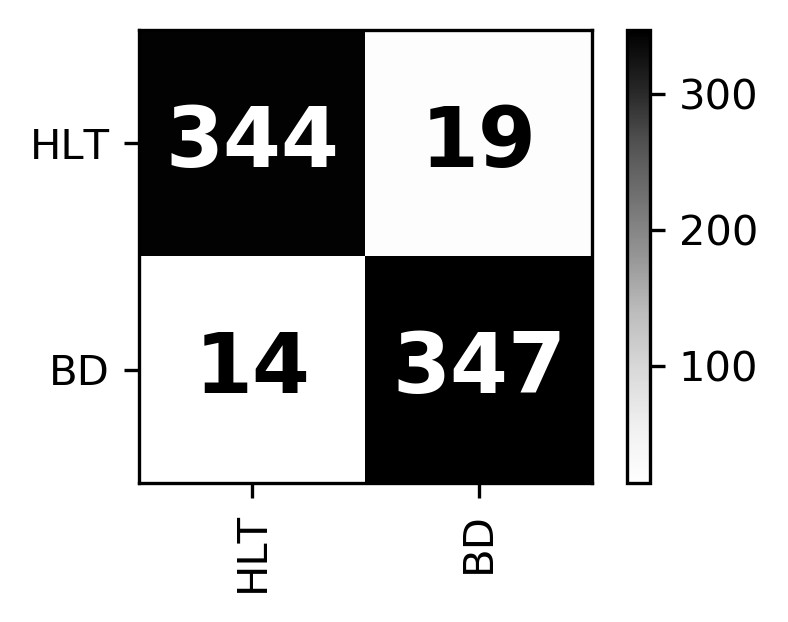

In [27]:
X, Y = ds.data_window(5, ds.ALL, ds.FREQ_ALL_PAPER, ds.MASK_NO_GND, True, True, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, BIN_FAILURES, "all_transient_5_bd")

##### 3 Hz 0.5s

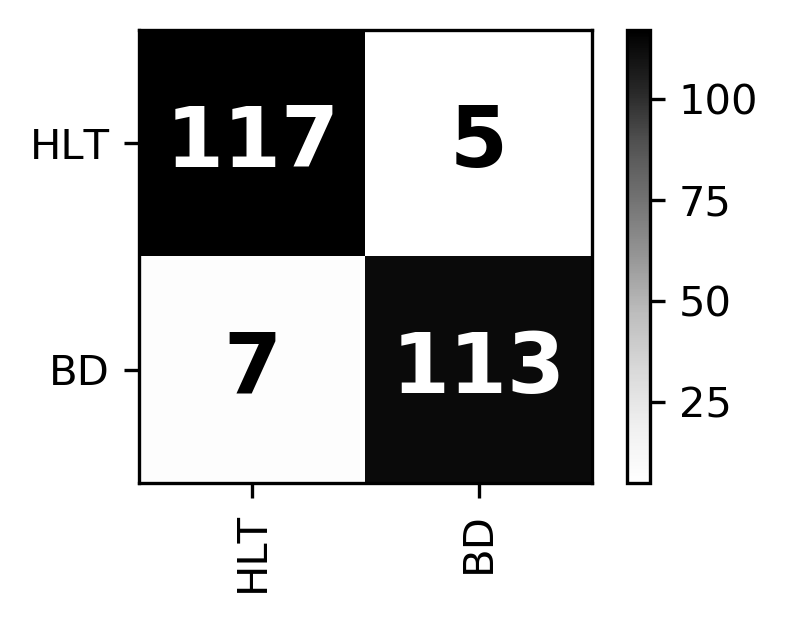

In [28]:
X, Y = ds.data_window(0.5, ds.ALL, ds.FREQ_3HZ, ds.MASK_NO_GND, True, True, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, BIN_FAILURES, "3hz_transient_05_bd")

##### 30 Hz 0.5s

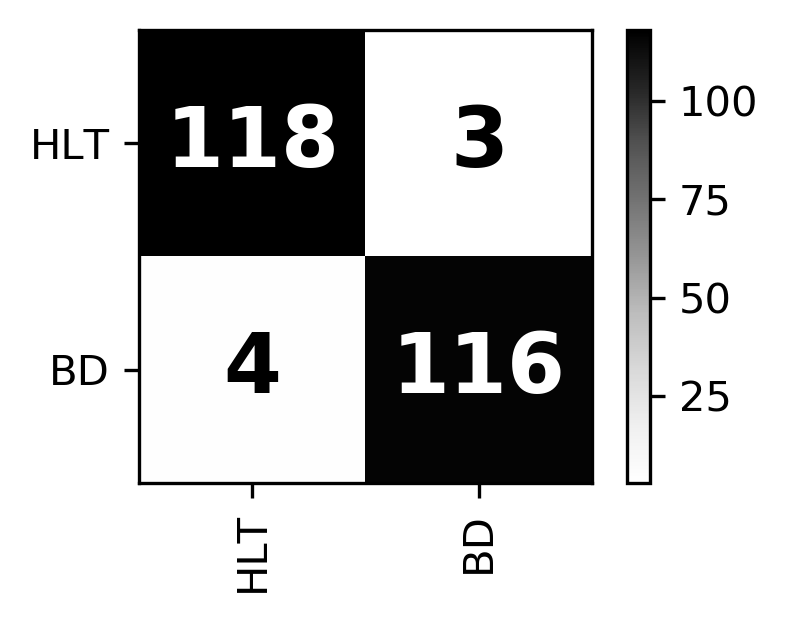

In [29]:
X, Y = ds.data_window(0.5, ds.ALL, ds.FREQ_30HZ, ds.MASK_NO_GND, True, True, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, BIN_FAILURES, "30hz_transient_05_bd")

##### Direct supply 0.5s

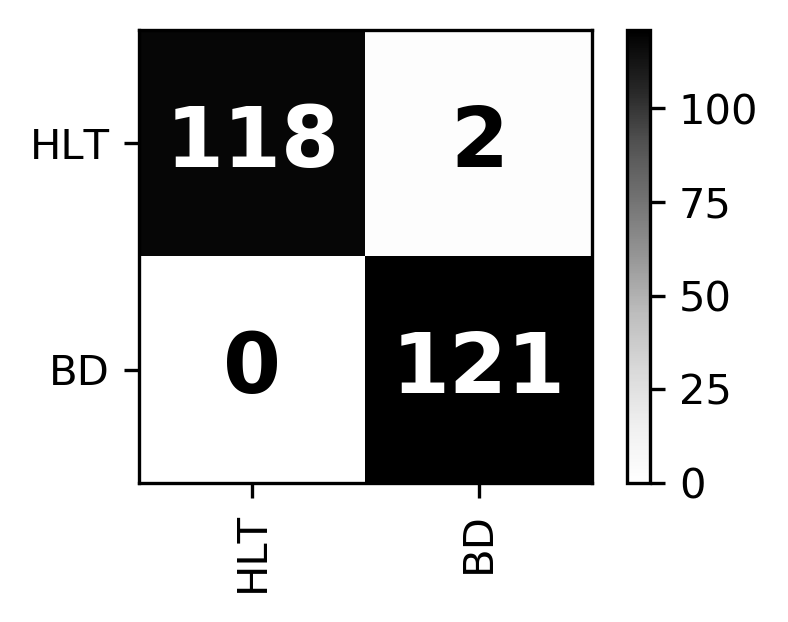

In [30]:
X, Y = ds.data_window(0.5, ds.ALL, ds.FREQ_LINE, ds.MASK_NO_GND, True, True, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, BIN_FAILURES, "line_transient_05_bd")

##### Frequency insensitive (3Hz + 30Hz + Direct Supply) 0.5s

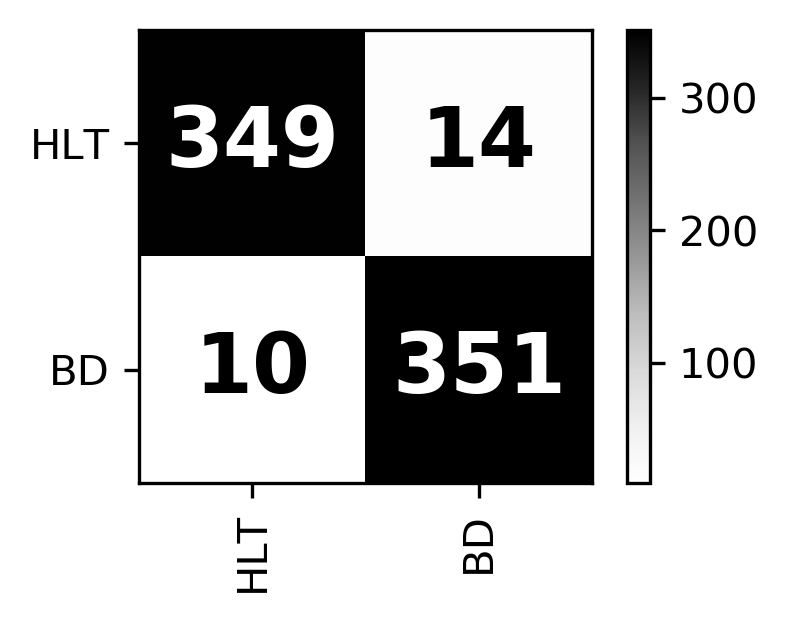

In [31]:
X, Y = ds.data_window(0.5, ds.ALL, ds.FREQ_ALL_PAPER, ds.MASK_NO_GND, True, True, ROOT_PATH)

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
n_pc_comps = [4, 7, 8, 33, 5, 19, 6, 35, 1, 17, 2, 2]

pcas = []
for n_components in n_pc_comps:
    pcas.append(PCA(n_components=n_components, random_state=46))
dt = DecisionTreeClassifier(random_state=46)
pbc = efc.ProjectedBaseClassifier(pcas, dt)
cm = predictions_confusion_matrices(X, Y, pbc, 10)

plot_confusion_matrix(cm, BIN_FAILURES, "all_transient_05_bd")